# Automata Celular Bidimensional:

## A. Simulación ACB (Generación GIF):

- Estados Iniciales [-1 , 1].
- Implementación en **Combinación Random (1 combinación)**.

### Regla Totalística:
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os

def inicial_random(tamano):
    np.random.seed(218)
    estado_inicial_r = np.random.choice([-1, 1], size=(tamano, tamano), p=[0.4, 0.6])
    return estado_inicial_r

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return celda_actual

def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

def visualizar_automata(automata, generaciones, tamano):
    fig, axs = plt.subplots(1, generaciones, figsize=(15, 15))

    for t in range(generaciones):
        axs[t].imshow(automata[t], cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)
        axs[t].set_xlabel('X')
        axs[t].set_ylabel('Y')
        axs[t].set_title(f'Generación {t} \nTamaño: {tamano}')
        axs[t].set_xticks([])
        axs[t].set_yticks([])

    plt.show()

# Ejemplo de uso
tamano = 10
generaciones = 60
estado_inicial = inicial_random(tamano)

automata = automata_celular(tamano, generaciones, estado_inicial)
## Generación visualización condicionada a cantidad de generaciones.
#visualizar_automata(automata, generaciones, tamano) 

### Creación Gif:

In [ ]:
import imageio

def crear_gif(automata, tamano, generaciones):
    nombre_archivo = f"BCA_s{tamano}_gen{generaciones}.gif"

    imagenes = []
    for idx, matriz in enumerate(automata):
        imagen = plt.imshow(matriz, cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)
        titulo = f"Generación {idx} \nTamaño Grilla {tamano}"
        plt.title(titulo)
        plt.axis('on')
        filename = "temp.png"
        plt.savefig(filename)
        plt.close()

        image = imageio.v2.imread(filename)
        os.remove(filename)
        imagenes.append(image)

    imageio.mimsave(nombre_archivo, imagenes, fps=2) #con fps regulo la tasa de imagenes por segundo

In [ ]:
crear_gif(automata, tamano, generaciones)

_________

## B. Simulación ACB (Generación GIF): 

- Estados Iniciales [-1 , 1].
- Implementación en **Todas las Combinaciones Posibles.**

### Regla Totalística:
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return celda_actual
    
def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata


def crear_gif(automata, tamano, generaciones, idx, directorio):
    nombre_archivo = f"{directorio}/BCA_s{tamano}_gen{generaciones}_{idx}.gif"

    imagenes = []
    for t, matriz in enumerate(automata):
        plt.imshow(matriz, cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)
        titulo = f"Generación {t} \nTamaño Grilla {tamano}"
        plt.title(titulo)
        plt.axis('on')
        filename = "temp.png"
        plt.savefig(filename)
        plt.close()

        image = imageio.v2.imread(filename)
        os.remove(filename)
        imagenes.append(image)

    imageio.mimsave(nombre_archivo, imagenes, fps=2)   # Con fps regulo la tasa de imágenes por segundo
    

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

directorio = f"BCA_s{tamano}_gen{generaciones}"
if not os.path.exists(directorio):
    os.makedirs(directorio)

for idx, estado in enumerate(estados):
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    crear_gif(automata, tamano, generaciones, idx, directorio)


__________

## C. Simulación ACB (Determinación Consenso): 

- Estados Iniciales [-1 , 1].
- Implementación en **Todas las Combinaciones Posibles.**
- Generación Gráficos (**Eficacia de Consenso** y **Eficacia de Clasificación**).

### Regla Totalística (Estricta):
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx

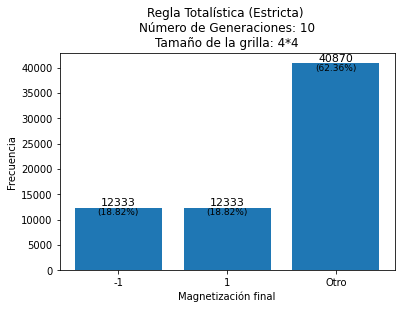

In [52]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return celda_actual
    
def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla Totalística (Estricta) \nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

### Crear Tabla inicial contando:
En función de la Magnetización inicial, obtener los siguiente datos:
- Cantidad de Combinaciones que tienen esa magnetización inicial.
- Cantidad de Combinaciones que dado una determinada Magnetización Inicial, poseen Magnetización final = 1.
- Cantidad de Combinaciones que dado una determinada Magnetización Inicial, poseen Magnetización final = -1.
- Cantidad de Combinaciones que dado una determinada Magnetización Inicial, poseen Magnetización final != [-1, 1].
- Eficacia de Consenso: Cantidad de Combinaciones que obtienen un punto fijo [-1, 1], dado una determinada Magnetización Inicial.
- Eficacia de Clasificación: Cantidad de Combinaciones que obtienen un punto fijo [-1] O [1], pero que respetan la mayoría inicial.

In [53]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

### Sumar Cantidades para comparación:

In [54]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [55]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,16,0,0,1.0,1.0
2,-0.75,120,120,0,0,1.0,1.0
3,-0.625,560,560,0,0,1.0,1.0
4,-0.5,1820,1780,0,40,0.978022,0.978022
5,-0.375,4368,3888,0,480,0.89011,0.89011
6,-0.25,8008,4608,0,3400,0.575425,0.575425
7,-0.125,11440,1360,0,10080,0.118881,0.118881
8,0.0,12870,0,0,12870,0.0,0.0
9,0.125,11440,0,1360,10080,0.118881,0.118881


### Generar Gráficos de Eficacia (Consenso y Clasificación):

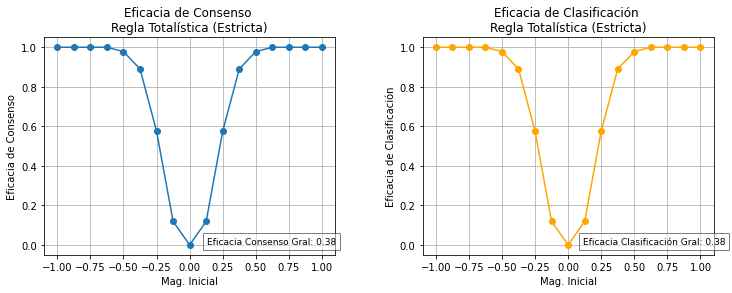

In [56]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla Totalística (Estricta)')
    ax1.text(0.56, 0.05, f'Eficacia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla Totalística (Estricta)')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

________

## D. Simulación ACB (Determinación Consenso): 

- Estados Iniciales [-1 , 1].
- Implementación en **Todas las Combinaciones Posibles.**
- Generación Gráficos (**Eficacia de Consenso** y **Eficacia de Clasificación**).

### Regla 4 - Totalística:
- Si Fx (Suma Vecinos) = [4] entonces 1.
- E.O.C. entonces -1.

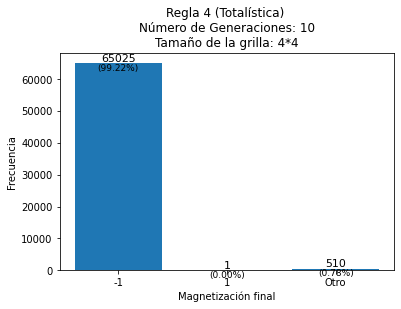

CPU times: user 95.9 ms, sys: 1.81 ms, total: 97.7 ms
Wall time: 33.4 ms


In [57]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == [4]:
        return 1
    else:
        return -1
    
def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla 4 (Totalística) \nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

%time plt.show()

In [58]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [59]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [60]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,16,0,0,1.0,1.0
2,-0.75,120,120,0,0,1.0,1.0
3,-0.625,560,560,0,0,1.0,1.0
4,-0.5,1820,1820,0,0,1.0,1.0
5,-0.375,4368,4368,0,0,1.0,1.0
6,-0.25,8008,8008,0,0,1.0,1.0
7,-0.125,11440,11440,0,0,1.0,1.0
8,0.0,12870,12868,0,2,0.999845,0.0
9,0.125,11440,11424,0,16,0.998601,0.0


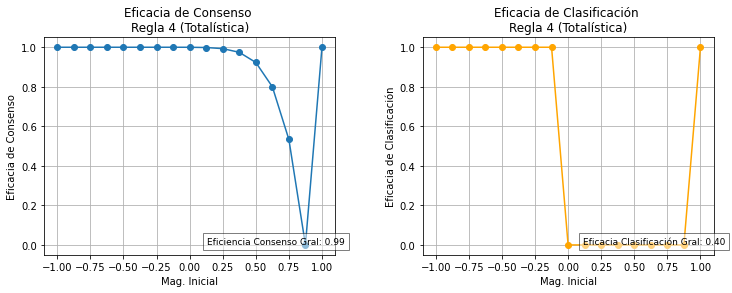

In [61]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla 4 (Totalística)')
    ax1.text(0.56, 0.05, f'Eficiencia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla 4 (Totalística)')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

_____

## E. Simulación ACB (Determinación Consenso): 

- Estados Iniciales [-1 , 1].
- Implementación en **Todas las Combinaciones Posibles.**
- Generación Gráficos (**Eficacia de Consenso** y **Eficacia de Clasificación**).

### Regla 24 - Totalística:
- Si Fx (Suma Vecinos) = [2, 4] entonces 1.
- E.O.C. entonces -1.

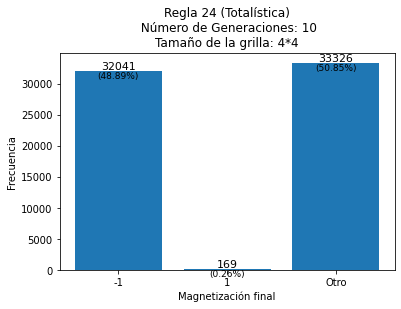

In [62]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == 2 or suma == 4:
        return 1
    else:
        return -1
    
def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla 24 (Totalística)\n Número de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [63]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [64]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [65]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,16,0,0,1.0,1.0
2,-0.75,120,120,0,0,1.0,1.0
3,-0.625,560,560,0,0,1.0,1.0
4,-0.5,1820,1804,0,16,0.991209,0.991209
5,-0.375,4368,4176,0,192,0.956044,0.956044
6,-0.25,8008,6992,0,1016,0.873127,0.873127
7,-0.125,11440,8288,0,3152,0.724476,0.724476
8,0.0,12870,6532,0,6338,0.507537,0.0
9,0.125,11440,2976,0,8464,0.26014,0.0


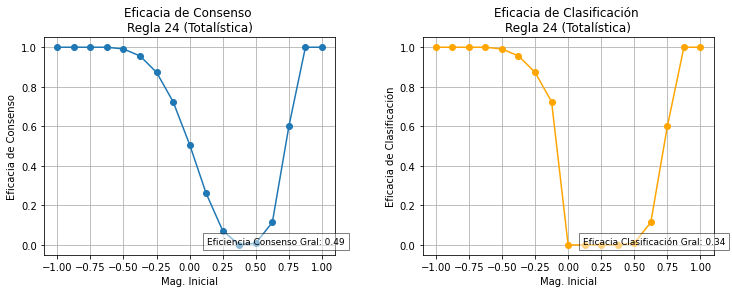

In [66]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla 24 (Totalística)')
    ax1.text(0.56, 0.05, f'Eficiencia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla 24 (Totalística)')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

_______

## F. Simulación ACB (Determinación Consenso): 

- Estados Iniciales [-1 , 1].
- Implementación en **Todas las Combinaciones Posibles.**
- Generación Gráficos (**Eficacia de Consenso** y **Eficacia de Clasificación**).

### Regla 04 - Totalística:
- Si Fx (Suma Vecinos) = [0, 4] entonces 1.
- E.O.C. entonces -1.

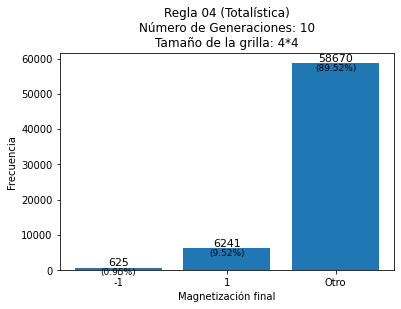

In [67]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == 0 or suma == 4:
        return 1
    else:
        return -1
    
def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla 04 (Totalística)\nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [68]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [69]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [70]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,16,0,0,1.0,1.0
2,-0.75,120,72,0,48,0.6,0.6
3,-0.625,560,64,0,496,0.114286,0.114286
4,-0.5,1820,32,0,1788,0.017582,0.017582
5,-0.375,4368,128,0,4240,0.029304,0.029304
6,-0.25,8008,72,0,7936,0.008991,0.008991
7,-0.125,11440,64,0,11376,0.005594,0.005594
8,0.0,12870,96,2916,9858,0.234033,0.226573
9,0.125,11440,0,0,11440,0.0,0.0


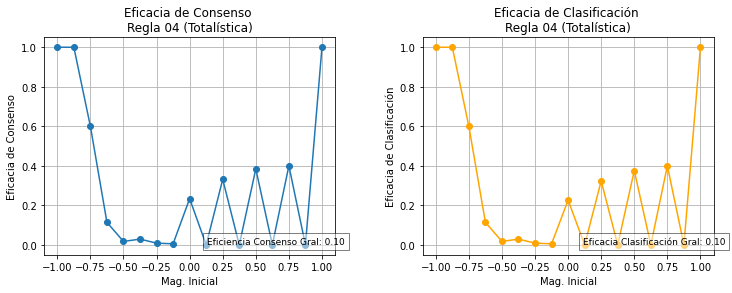

In [71]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla 04 (Totalística)')
    ax1.text(0.56, 0.05, f'Eficiencia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla 04 (Totalística)')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

_______

## G. Simulación ACB (Determinación Consenso): 

- Estados Iniciales [-1 , 1].
- Implementación en **Todas las Combinaciones Posibles.**
- Generación Gráficos (**Eficacia de Consenso** y **Eficacia de Clasificación**).

### Regla 024 - Totalística:
- Si Fx (Suma Vecinos) = [0, 2, 4] entonces 1.
- E.O.C. entonces -1.

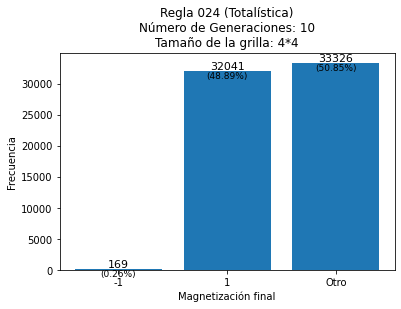

In [72]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == 0 or suma == 2 or suma == 4:
        return 1
    else:
        return -1
    
def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla 024 (Totalística)\nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [73]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [74]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [75]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,16,0,0,1.0,1.0
2,-0.75,120,72,0,48,0.6,0.6
3,-0.625,560,64,0,496,0.114286,0.114286
4,-0.5,1820,16,0,1804,0.008791,0.008791
5,-0.375,4368,0,0,4368,0.0,0.0
6,-0.25,8008,0,576,7432,0.071928,0.0
7,-0.125,11440,0,2976,8464,0.26014,0.0
8,0.0,12870,0,6532,6338,0.507537,0.507537
9,0.125,11440,0,8288,3152,0.724476,0.724476


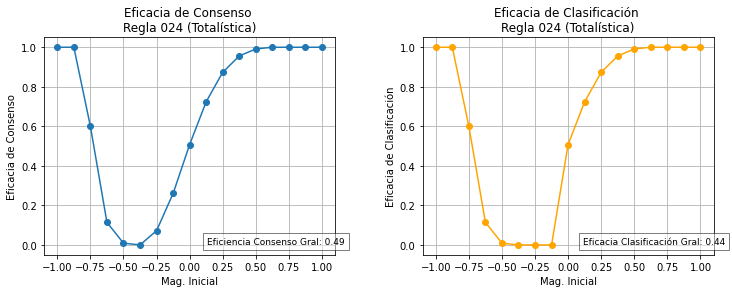

In [76]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla 024 (Totalística)')
    ax1.text(0.56, 0.05, f'Eficiencia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla 024 (Totalística)')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

_______

## H. Simulación ACB (Determinación Consenso): 

- Estados Iniciales [-1 , 1].
- Implementación en **Todas las Combinaciones Posibles.**
- Generación Gráficos (**Eficacia de Consenso** y **Eficacia de Clasificación**).

### Regla -24 - Totalística:
- Si Fx (Suma Vecinos) = [-2, 4] entonces 1.
- E.O.C. entonces -1.

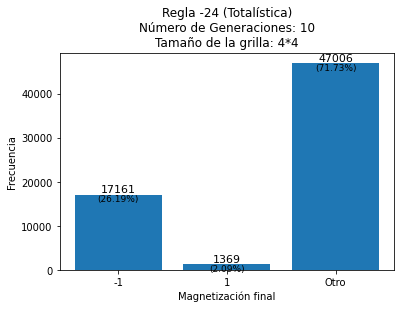

In [77]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == -2 or suma == 4:
        return 1
    else:
        return -1
    
def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla -24 (Totalística)\nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [78]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [79]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [80]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,0,0,16,0.0,0.0
2,-0.75,120,48,0,72,0.4,0.4
3,-0.625,560,0,0,560,0.0,0.0
4,-0.5,1820,684,16,1120,0.384615,0.375824
5,-0.375,4368,48,0,4320,0.010989,0.010989
6,-0.25,8008,2648,0,5360,0.330669,0.330669
7,-0.125,11440,1152,256,10032,0.123077,0.100699
8,0.0,12870,4260,0,8610,0.331002,0.0
9,0.125,11440,2592,0,8848,0.226573,0.0


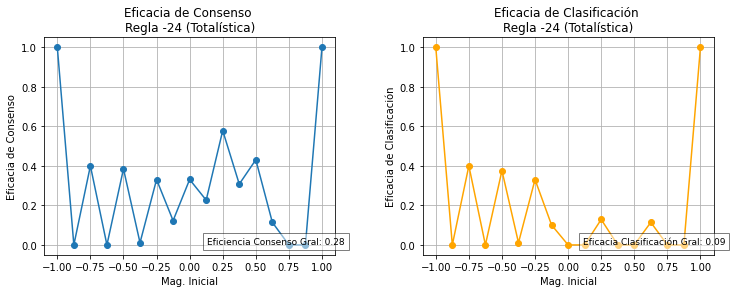

In [81]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla -24 (Totalística)')
    ax1.text(0.56, 0.05, f'Eficiencia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla -24 (Totalística)')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

_______

## I. Simulación ACB (Determinación Consenso): 

- Estados Iniciales [-1 , 1].
- Implementación en **Todas las Combinaciones Posibles.**
- Generación Gráficos (**Eficacia de Consenso** y **Eficacia de Clasificación**).

### Regla -224 - Totalística:
- Si Fx (Suma Vecinos) = [-2, 2, 4] entonces 1.
- E.O.C. entonces -1.

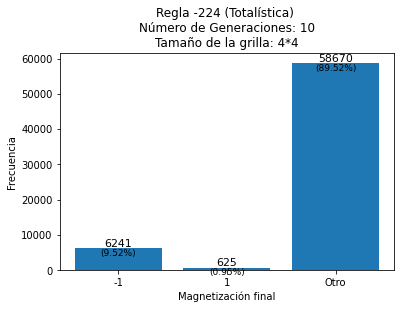

In [82]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == -2 or suma == 2 or suma == 4:
        return 1
    else:
        return -1
    
def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla -224 (Totalística) \nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [83]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [84]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [85]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,0,0,16,0.0,0.0
2,-0.75,120,48,0,72,0.4,0.4
3,-0.625,560,0,0,560,0.0,0.0
4,-0.5,1820,684,16,1120,0.384615,0.375824
5,-0.375,4368,0,0,4368,0.0,0.0
6,-0.25,8008,2592,64,5352,0.331668,0.323676
7,-0.125,11440,0,0,11440,0.0,0.0
8,0.0,12870,2916,96,9858,0.234033,0.007459
9,0.125,11440,0,64,11376,0.005594,0.005594


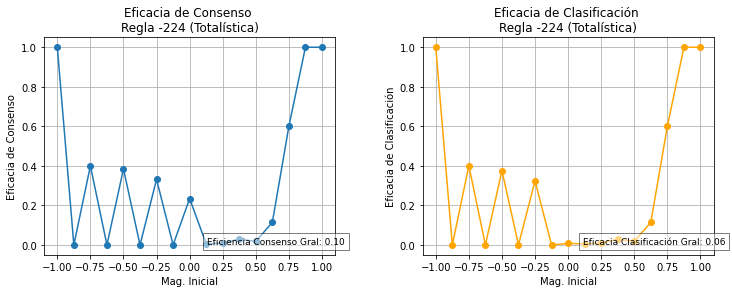

In [86]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla -224 (Totalística)')
    ax1.text(0.56, 0.05, f'Eficiencia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla -224 (Totalística)')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

_______

## J. Simulación ACB (Determinación Consenso): 

- Estados Iniciales [-1 , 1].
- Implementación en **Todas las Combinaciones Posibles.**
- Generación Gráficos (**Eficacia de Consenso** y **Eficacia de Clasificación**).

### Regla -204 - Totalística:
- Si Fx (Suma Vecinos) = [-2, 0, 4] entonces 1.
- E.O.C. entonces -1.

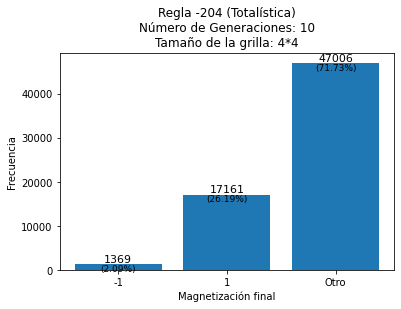

In [87]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == -2 or suma == 0 or suma == 4:
        return 1
    else:
        return -1
    
def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla -204 (Totalística)\nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [88]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [89]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [90]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,0,0,16,0.0,0.0
2,-0.75,120,0,0,120,0.0,0.0
3,-0.625,560,64,0,496,0.114286,0.114286
4,-0.5,1820,0,784,1036,0.430769,0.0
5,-0.375,4368,0,1344,3024,0.307692,0.0
6,-0.25,8008,1032,3600,3376,0.578422,0.128871
7,-0.125,11440,0,2592,8848,0.226573,0.0
8,0.0,12870,0,4260,8610,0.331002,0.331002
9,0.125,11440,256,1152,10032,0.123077,0.100699


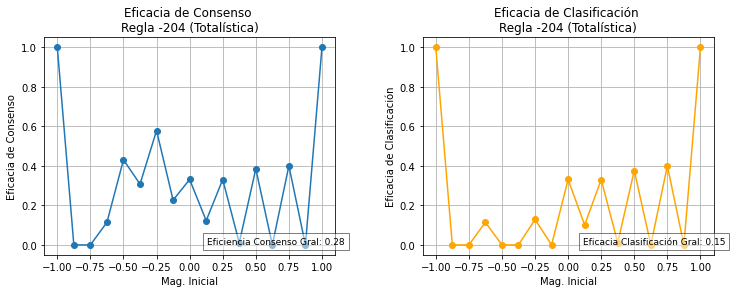

In [91]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla -204 (Totalística)')
    ax1.text(0.56, 0.05, f'Eficiencia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla -204 (Totalística)')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

_______

## K. Simulación ACB (Determinación Consenso): 

- Estados Iniciales [-1 , 1].
- Implementación en **Todas las Combinaciones Posibles.**
- Generación Gráficos (**Eficacia de Consenso** y **Eficacia de Clasificación**).

### Regla -2024 - Totalística:
- Si Fx (Suma Vecinos) = [-2, 0, 2, 4] entonces 1.
- E.O.C. entonces -1.

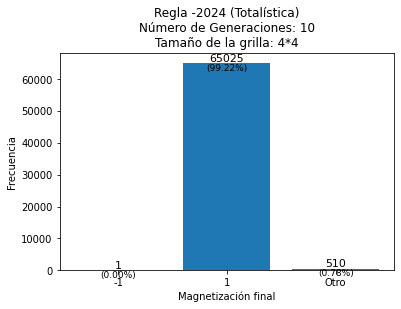

In [92]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == -2 or suma == 0 or suma == 2 or suma == 4:
        return 1
    else:
        return -1
    
def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla -2024 (Totalística)\nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [93]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [94]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [95]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,0,0,16,0.0,0.0
2,-0.75,120,0,64,56,0.533333,0.0
3,-0.625,560,0,448,112,0.8,0.0
4,-0.5,1820,0,1680,140,0.923077,0.0
5,-0.375,4368,0,4256,112,0.974359,0.0
6,-0.25,8008,0,7952,56,0.993007,0.0
7,-0.125,11440,0,11424,16,0.998601,0.0
8,0.0,12870,0,12868,2,0.999845,0.999845
9,0.125,11440,0,11440,0,1.0,1.0


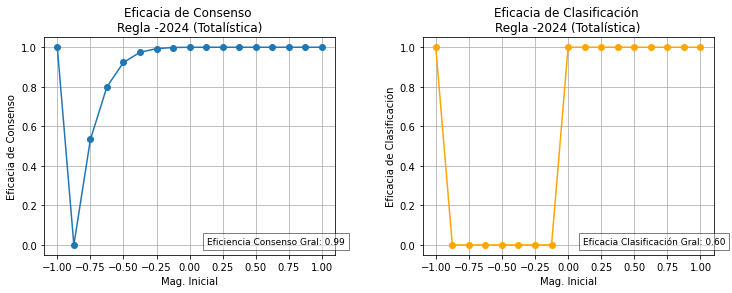

In [96]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla -2024 (Totalística)')
    ax1.text(0.56, 0.05, f'Eficiencia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla -2024 (Totalística)')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

_______

## L. Simulación ACB (Generación GIF):
- Estados Iniciales [-1 , 1].
- Implementación en **Combinación Random (100 combinación)**.
- Magnetización inicial [-0.125 - 0.125].

### Regla Totalística:
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx

In [97]:
import numpy as np
import random

tamano = 100
num_matrices = 50
seed = 218
magnetizacion_min = -0.25
magnetizacion_max = 0.25

random.seed(seed)

def crear_matriz_aleatoria(tamano, magnetizacion_min, magnetizacion_max):
    while True:
        matriz = np.random.choice([-1, 1], size=(tamano, tamano))
        magnetizacion = np.mean(matriz)
        
        if abs(magnetizacion) > (magnetizacion_max - magnetizacion_min) / 2:
            continue
        
        ajuste = random.randint(magnetizacion_min * tamano**2, magnetizacion_max * tamano**2)
        signo_ajuste = np.sign(ajuste)

        for _ in range(abs(ajuste)):
            i, j = random.randint(0, tamano - 1), random.randint(0, tamano - 1)
            while matriz[i, j] == signo_ajuste:
                i, j = random.randint(0, tamano - 1), random.randint(0, tamano - 1)
            matriz[i, j] = signo_ajuste
        
        magnetizacion = np.mean(matriz)

        if magnetizacion_min <= magnetizacion <= magnetizacion_max:
            return matriz

matrices_aleatorias = [crear_matriz_aleatoria(tamano, magnetizacion_min, magnetizacion_max) for _ in range(num_matrices)]

# Calcular y mostrar la magnetización mínima y máxima de las matrices generadas
magnetizaciones_generadas = [np.mean(matriz) for matriz in matrices_aleatorias]
min_magnetizacion = min(magnetizaciones_generadas)
max_magnetizacion = max(magnetizaciones_generadas)

print(f"Magnetización mínima generada: {min_magnetizacion}")
print(f"Magnetización máxima generada: {max_magnetizacion}")

Magnetización mínima generada: -0.2446
Magnetización máxima generada: 0.2354


In [98]:
def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return celda_actual

def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

# Ejemplo de uso
generaciones = 100
estado_inicial = matrices_aleatorias

# Crear autómatas celulares para cada estado inicial en matrices_aleatorias
automatas_celulares = [automata_celular(tamano, generaciones, estado_inicial) for estado_inicial in matrices_aleatorias]

KeyboardInterrupt: 

In [ ]:
#automatas_celulares[49]

In [ ]:
import os
import matplotlib.pyplot as plt
import imageio

def crear_gif(automata, tamano, generaciones, idx, directorio):
    if not os.path.exists(directorio):
        os.makedirs(directorio)

    nombre_archivo = f"{directorio}/BCA_s{tamano}_gen{generaciones}_{idx}.gif"

    imagenes = []
    for t, matriz in enumerate(automata):
        plt.imshow(matriz, cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)
        titulo = f"Generación {t} \nTamaño Grilla {tamano} \nRegla: Strict"
        plt.title(titulo)
        plt.axis('on')
        filename = "temp.png"
        plt.savefig(filename)
        plt.close()

        image = imageio.v2.imread(filename)
        os.remove(filename)
        imagenes.append(image)

    imageio.mimsave(nombre_archivo, imagenes, fps=3)

directorio_gifs = f"BCA_s{tamano}_gen{generaciones}_strict_MagIni0.25"

# Iterar sobre la lista de autómatas celulares y generar un GIF para cada uno
for i, automata in enumerate(automatas_celulares):
    crear_gif(automata, tamano, generaciones, i, directorio_gifs)

In [ ]:
def contar_ciclos(automatas_celulares):
    contador_ciclos = 0

    for idx, automata in enumerate(automatas_celulares):
        for gen in range(automata.shape[0] - 2):
            if (automata[gen] == automata[gen + 2]).all() and not (automata[gen] == automata[gen + 1]).all():
                contador_ciclos += 1
                break

    return contador_ciclos

cantidad_ciclos = contar_ciclos(automatas_celulares)
print(f"{cantidad_ciclos} de {len(automatas_celulares)} autómatas celulares generan ciclos de largo 2.")

In [ ]:
def medir_magnetizacion_y_trasciente(automatas_celulares):
    resultados = []

    for idx, automata in enumerate(automatas_celulares):
        magnetizacion_inicial = np.mean(automata[0])
        magnetizacion_final = None
        trasciente = None

        for gen in range(automata.shape[0] - 2):
            if (automata[gen] == automata[gen + 2]).all() and not (automata[gen] == automata[gen + 1]).all():
                magnetizacion_final = np.mean(automata[gen])
                trasciente = gen
                break

        resultados.append({
            'Autómata': idx,
            'Magnetización Inicial': magnetizacion_inicial,
            'Magnetización Final': magnetizacion_final,
            'Trasciente': trasciente
        })

    return resultados

def crear_tabla(resultados):
    tabla = pd.DataFrame(resultados)
    return tabla

resultados = medir_magnetizacion_y_trasciente(automatas_celulares)
tabla = crear_tabla(resultados)
print(tabla)

In [ ]:
def graficar_resultados(tabla):
    tabla = tabla

    fig, ax = plt.subplots(figsize=(10, 6))

    handles = []
    labels = []
    for index, row in tabla.iterrows():
        line, = ax.plot([row['Magnetización Inicial'], row['Magnetización Final']], 
                [0, row['Trasciente']], marker='o', linestyle='-', label=f'Autómata {index}')
        
        if row['Trasciente'] > 15:
            handles.append(line)
            labels.append(f'Autómata {index}')

    ax.set_xlabel('Magnetización')
    ax.xaxis.set_ticks(np.linspace(-0.8, 0.8, 15))
    ax.yaxis.set_ticks(np.arange(0, 22, 2))
    ax.set_ylabel('Trasciente (Generaciones para estado estable)')
    ax.set_title('Magnetización Inicial y Final vs Trasciente (Ciclo Largo 2)\n Regla Totalística (Estricta)')
    ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(True)

    plt.show()

graficar_resultados(tabla)

In [ ]:
import pandas as pd
import numpy as np

def obtener_promedio(automatas):
    promedios = []
    for idx, matriz in enumerate(automatas):
        promedio = np.mean(matriz)
        valor_hexadecimal = hex(int(promedio * 255))[2:].upper()
        promedios.append({
            'Index': idx,
            'Promedio': promedio,
            'Valor Hexa': valor_hexadecimal
        })
    tabla = pd.DataFrame(promedios)
    return tabla

In [ ]:
tabla_promedios = obtener_promedio(automatas_celulares[46])
print(tabla_promedios)

In [ ]:
tabla_promedios['Valor Hexa'].head(25)

________

## M. Combinación de Reglas:
- Estados Iniciales [-1 , 1].
- Implementación en **Muestra aleatoria (50 Matrices)**.
- Características de la Muestra: Magnetización inicial [-0.25 - 0.25].

### Aplicación de Reglas:
- Total de 100 generaciones:
    - 50 Generaciones 1ra regla.
        - Detección Largo ciclo 2.
    - 50 Generaciones 2da regla.
        - Detección de Consenso.

#### Regla Totalística - Generaciones [0 - 49]:
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx

#### Regla 024 - Generaciones [50 - 99]:
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx


In [99]:
import numpy as np
import random

tamano = 100
num_matrices = 50
seed = 218
magnetizacion_min = -0.25
magnetizacion_max = 0.25

random.seed(seed)

def crear_matriz_aleatoria(tamano, magnetizacion_min, magnetizacion_max):
    while True:
        matriz = np.random.choice([-1, 1], size=(tamano, tamano))
        magnetizacion = np.mean(matriz)
        
        if abs(magnetizacion) > (magnetizacion_max - magnetizacion_min) / 2:
            continue
        
        ajuste = random.randint(magnetizacion_min * tamano**2, magnetizacion_max * tamano**2)
        signo_ajuste = np.sign(ajuste)

        for _ in range(abs(ajuste)):
            i, j = random.randint(0, tamano - 1), random.randint(0, tamano - 1)
            while matriz[i, j] == signo_ajuste:
                i, j = random.randint(0, tamano - 1), random.randint(0, tamano - 1)
            matriz[i, j] = signo_ajuste
        
        magnetizacion = np.mean(matriz)

        if magnetizacion_min <= magnetizacion <= magnetizacion_max:
            return matriz

matrices_aleatorias = [crear_matriz_aleatoria(tamano, magnetizacion_min, magnetizacion_max) for _ in range(num_matrices)]

# Calcular y mostrar la magnetización mínima y máxima de las matrices generadas
magnetizaciones_generadas = [np.mean(matriz) for matriz in matrices_aleatorias]
min_magnetizacion = min(magnetizaciones_generadas)
max_magnetizacion = max(magnetizaciones_generadas)

print(f"Magnetización mínima generada: {min_magnetizacion}")
print(f"Magnetización máxima generada: {max_magnetizacion}")

Magnetización mínima generada: -0.239
Magnetización máxima generada: 0.2474


In [100]:
def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica_original(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return celda_actual

def regla_totalistica_nueva(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma in valores_regla:
        return 1
    else:
        return -1

def siguiente_generacion(estado, regla):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial, regla_1, regla_2, cambio_generacion):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        regla_actual = regla_1 if t < cambio_generacion else regla_2
        automata[t] = siguiente_generacion(automata[t - 1], regla_actual)

    return automata

# Ejemplo de uso
generaciones = 100
estado_inicial = matrices_aleatorias
cambio_generacion = 50
valores_regla = {0,2,4}

# Crear autómatas celulares para cada estado inicial en matrices_aleatorias con las dos reglas
automatas_celulares = [automata_celular(tamano, generaciones, estado_inicial, 
                                        regla_totalistica_original, regla_totalistica_nueva, 
                                        cambio_generacion) for estado_inicial in matrices_aleatorias]

In [101]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for automata in automatas_celulares:
    estado_inicial = automata[0]
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    estado_final = automata[-1]
    magnetizacion_fin = magnetizacion(estado_final)

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

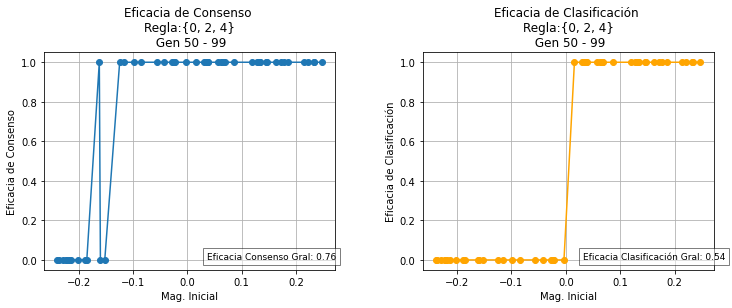

In [102]:
import matplotlib.pyplot as plt

def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title(f'Eficacia de Consenso \nRegla:{valores_regla}\n Gen 50 - 99')
    ax1.text(0.56, 0.05, f'Eficacia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title(f'Eficacia de Clasificación \nRegla:{valores_regla}\n Gen 50 - 99')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

In [ ]:
import os
import matplotlib.pyplot as plt
import imageio

def crear_gif(automata, tamano, generaciones, idx, directorio, cambio_generacion):
    if not os.path.exists(directorio):
        os.makedirs(directorio)

    nombre_archivo = f"{directorio}/BCA_s{tamano}_gen{generaciones}_{idx}.gif"

    imagenes = []
    for t, matriz in enumerate(automata):
        plt.imshow(matriz, cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)

        # Actualizar el título según la generación y las reglas aplicadas
        if t < cambio_generacion:
            titulo = f"Generación {t} \nTamaño Grilla {tamano} \nRegla: Strict"
        else:
            titulo = f"Generación {t} \nTamaño Grilla {tamano} \nRegla: {valores_regla}"

        plt.title(titulo)
        plt.axis('on')
        filename = "temp.png"
        plt.savefig(filename)
        plt.close()

        image = imageio.v2.imread(filename)
        os.remove(filename)
        imagenes.append(image)

    imageio.mimsave(nombre_archivo, imagenes, fps=10)

directorio_gifs = f"BCA_s{tamano}_gen{generaciones}_mixStrict-{valores_regla}"

# Iterar sobre la lista de autómatas celulares y generar un GIF para cada uno
for i, automata in enumerate(automatas_celulares):
    # Agregar el argumento cambio_generacion a la llamada de la función crear_gif
    crear_gif(automata, tamano, generaciones, i, directorio_gifs, cambio_generacion)

## N. Combinación de Reglas:
- Estados Iniciales [-1 , 1].
- Implementación en **Muestra aleatoria (50 Matrices)**.
- Características de la Muestra: Magnetización inicial [-0.125 - 0.125].

### Aplicación de Reglas:
- Total de 100 generaciones:
    - 50 Generaciones 1ra regla.
        - Detección Largo ciclo 2.
    - 50 Generaciones 2da/3ra regla.
        - Detección de Consenso.

#### Regla Totalística - Generaciones [0 - 49]:
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx

#### Regla 024 - Generaciones [50 - 99]:
- Si Fx (Suma Vecinos) = {0,2,4} entonces 1.
- E.O.C. -1

#### Regla 24 - Generaciones [50 - 99]:
- Si Fx (Suma Vecinos) = {2,4} entonces 1.
- E.O.C. -1


In [103]:
import numpy as np
import random

tamano = 100
num_matrices = 50
seed = 218
magnetizacion_min = -0.25
magnetizacion_max = 0.25

random.seed(seed)

def crear_matriz_aleatoria(tamano, magnetizacion_min, magnetizacion_max):
    while True:
        matriz = np.random.choice([-1, 1], size=(tamano, tamano))
        magnetizacion = np.mean(matriz)
        
        if abs(magnetizacion) > (magnetizacion_max - magnetizacion_min) / 2:
            continue
        
        ajuste = random.randint(magnetizacion_min * tamano**2, magnetizacion_max * tamano**2)
        signo_ajuste = np.sign(ajuste)

        for _ in range(abs(ajuste)):
            i, j = random.randint(0, tamano - 1), random.randint(0, tamano - 1)
            while matriz[i, j] == signo_ajuste:
                i, j = random.randint(0, tamano - 1), random.randint(0, tamano - 1)
            matriz[i, j] = signo_ajuste
        
        magnetizacion = np.mean(matriz)

        if magnetizacion_min <= magnetizacion <= magnetizacion_max:
            return matriz

matrices_aleatorias = [crear_matriz_aleatoria(tamano, magnetizacion_min, magnetizacion_max) for _ in range(num_matrices)]

# Calcular y mostrar la magnetización mínima y máxima de las matrices generadas
magnetizaciones_generadas = [np.mean(matriz) for matriz in matrices_aleatorias]
min_magnetizacion = min(magnetizaciones_generadas)
max_magnetizacion = max(magnetizaciones_generadas)

print(f"Magnetización mínima generada: {min_magnetizacion}")
print(f"Magnetización máxima generada: {max_magnetizacion}")

Magnetización mínima generada: -0.2382
Magnetización máxima generada: 0.2446


In [104]:
def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica_original(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return celda_actual

def regla_totalistica_nueva_uno(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma in valores_regla_uno:
        return 1
    else:
        return -1
    
def regla_totalistica_nueva_dos(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma in valores_regla_dos:
        return 1
    else:
        return -1

def siguiente_generacion(estado, regla):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial, regla_1, regla_2, regla_3, cambio_generacion):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        if t < cambio_generacion:
            regla_actual = regla_1
        else:
            magnetizacion = np.mean(automata[cambio_generacion - 1])
            if magnetizacion >= 0:
                regla_actual = regla_2
            else:
                regla_actual = regla_3
        automata[t] = siguiente_generacion(automata[t - 1], regla_actual)

    return automata

# Ejemplo de uso
generaciones = 100
estado_inicial = matrices_aleatorias
cambio_generacion = 50
valores_regla_uno = {0,2,4}
valores_regla_dos = {2,4}

# Crear autómatas celulares para cada estado inicial en matrices_aleatorias con las tres reglas
automatas_celulares = [automata_celular(tamano, generaciones, estado_inicial, 
                                        regla_totalistica_original, regla_totalistica_nueva_uno, 
                                        regla_totalistica_nueva_dos, 
                                        cambio_generacion) for estado_inicial in matrices_aleatorias]

In [105]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for automata in automatas_celulares:
    estado_inicial = automata[0]
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    estado_final = automata[-1]
    magnetizacion_fin = magnetizacion(estado_final)

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

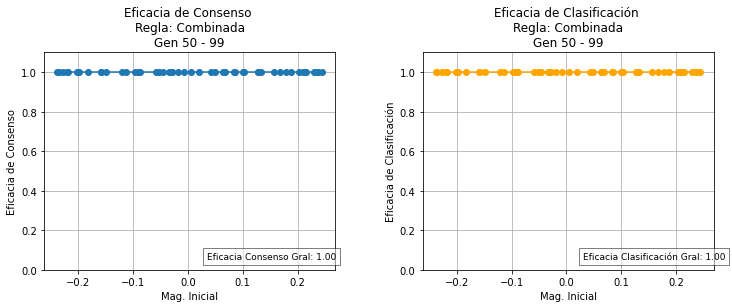

In [106]:
import matplotlib.pyplot as plt

def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    # Establecer los límites de los ejes y
    y_min = 0
    y_max = 1.1
    ax1.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', 
             label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title(f'Eficacia de Consenso \nRegla: Combinada\nGen 50 - 99')
    ax1.text(0.56, 0.05, f'Eficacia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', 
             color='orange', label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title(f'Eficacia de Clasificación \nRegla: Combinada\nGen 50 - 99')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

In [ ]:
import os
import matplotlib.pyplot as plt
import imageio

def crear_gif(automata, tamano, generaciones, idx, directorio, cambio_generacion):
    if not os.path.exists(directorio):
        os.makedirs(directorio)

    nombre_archivo = f"{directorio}/BCA_s{tamano}_gen{generaciones}_{idx}.gif"

    imagenes = []
    for t, matriz in enumerate(automata):
        plt.imshow(matriz, cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)

        # Actualizar el título según la generación y las reglas aplicadas
        if t < cambio_generacion:
            titulo = f"Generación {t} \nTamaño Grilla {tamano} \nRegla: Strict"
        else:
            titulo = f"Generación {t} \nTamaño Grilla {tamano} \nRegla: Combinada"

        plt.title(titulo)
        plt.axis('on')
        filename = "temp.png"
        plt.savefig(filename)
        plt.close()

        image = imageio.v2.imread(filename)
        os.remove(filename)
        imagenes.append(image)

    imageio.mimsave(nombre_archivo, imagenes, fps=10)

directorio_gifs = f"BCA_s{tamano}_gen{generaciones}_mixStrict-Combinada"

# Iterar sobre la lista de autómatas celulares y generar un GIF para cada uno
for i, automata in enumerate(automatas_celulares):
    # Agregar el argumento cambio_generacion a la llamada de la función crear_gif
    crear_gif(automata, tamano, generaciones, i, directorio_gifs, cambio_generacion)

## N. Simulación ACB (Determinación Consenso - Actualización Secuencial): 

- Estados Iniciales [-1 , 1].
- Implementación en **Todas las Combinaciones Posibles.**
- Generación Gráficos (**Eficacia de Consenso** y **Eficacia de Clasificación**).

### Regla Totalística (Izquierda - Derecha):
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx

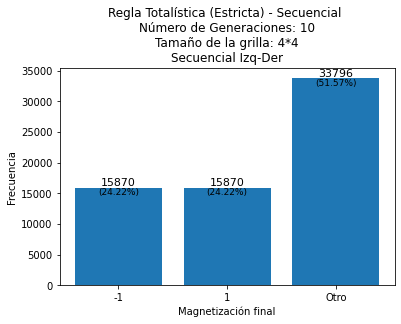

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return celda_actual

def siguiente_generacion_secuencial(estado):
    tamano = estado.shape[0]
    nueva_generacion = estado.copy()

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(nueva_generacion, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, nueva_generacion[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion_secuencial(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla Totalística (Estricta) - Secuencial \nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}\nSecuencial Izq-Der")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [2]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [3]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [4]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,16,0,0,1.0,1.0
2,-0.75,120,120,0,0,1.0,1.0
3,-0.625,560,560,0,0,1.0,1.0
4,-0.5,1820,1772,0,48,0.973626,0.973626
5,-0.375,4368,3782,0,586,0.865842,0.865842
6,-0.25,8008,5042,0,2966,0.62962,0.62962
7,-0.125,11440,3570,53,7817,0.316696,0.312063
8,0.0,12870,954,954,10962,0.148252,0.074126
9,0.125,11440,53,3570,7817,0.316696,0.312063


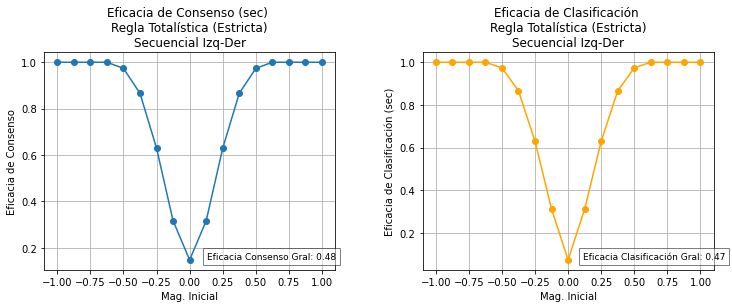

In [5]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso (sec) \nRegla Totalística (Estricta)\nSecuencial Izq-Der')
    ax1.text(0.56, 0.05, f'Eficacia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación (sec)')
    ax2.set_title('Eficacia de Clasificación \nRegla Totalística (Estricta)\nSecuencial Izq-Der')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

### Regla Totalística (Derecha - Izquierda):
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx

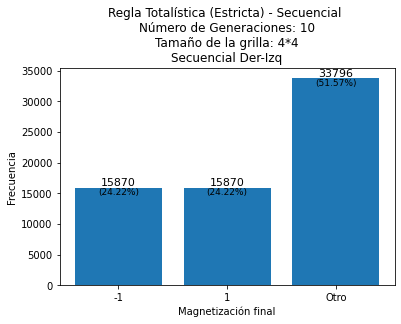

In [6]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return celda_actual

def siguiente_generacion_secuencial(estado):
    tamano = estado.shape[0]
    nueva_generacion = estado.copy()

    for i in reversed(range(tamano)):
        for j in reversed(range(tamano)):
            vecindad = vecinos(nueva_generacion, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, nueva_generacion[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion_secuencial(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla Totalística (Estricta) - Secuencial \nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}\nSecuencial Der-Izq")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [7]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [8]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [9]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,16,0,0,1.0,1.0
2,-0.75,120,120,0,0,1.0,1.0
3,-0.625,560,560,0,0,1.0,1.0
4,-0.5,1820,1772,0,48,0.973626,0.973626
5,-0.375,4368,3782,0,586,0.865842,0.865842
6,-0.25,8008,5042,0,2966,0.62962,0.62962
7,-0.125,11440,3570,53,7817,0.316696,0.312063
8,0.0,12870,954,954,10962,0.148252,0.074126
9,0.125,11440,53,3570,7817,0.316696,0.312063


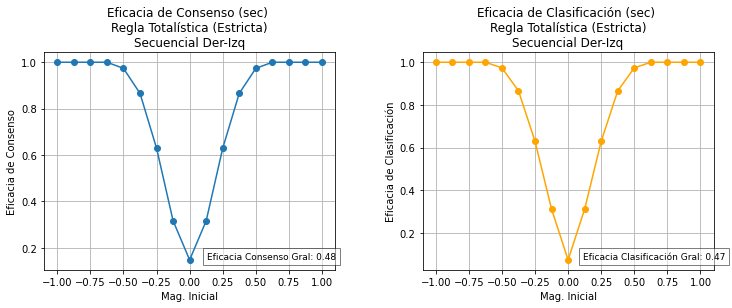

In [10]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso (sec) \nRegla Totalística (Estricta)\nSecuencial Der-Izq')
    ax1.text(0.56, 0.05, f'Eficacia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación (sec) \nRegla Totalística (Estricta)\nSecuencial Der-Izq')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

### Regla 24 (Izquierda-Derecha):
- Si Fx (Suma Vecinos) = {2,4} entonces 1.
- E.O.C. -1

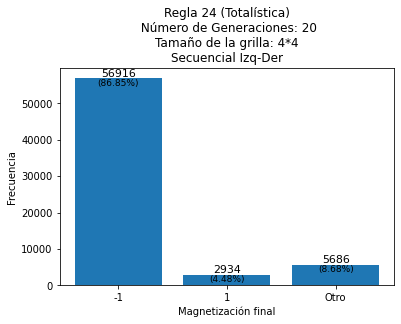

In [151]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == 2 or suma == 4:
        return 1
    else:
        return -1
    
def siguiente_generacion_secuencial(estado):
    tamano = estado.shape[0]
    nueva_generacion = estado.copy()

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(nueva_generacion, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, nueva_generacion[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion_secuencial(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 20

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla 24 (Totalística)\n Número de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}\nSecuencial Izq-Der")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [12]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [13]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [14]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,16,0,0,1.0,1.0
2,-0.75,120,120,0,0,1.0,1.0
3,-0.625,560,560,0,0,1.0,1.0
4,-0.5,1820,1820,0,0,1.0,1.0
5,-0.375,4368,4368,0,0,1.0,1.0
6,-0.25,8008,8008,0,0,1.0,1.0
7,-0.125,11440,11412,0,28,0.997552,0.997552
8,0.0,12870,12620,4,246,0.980886,0.000311
9,0.125,11440,10400,68,972,0.915035,0.005944


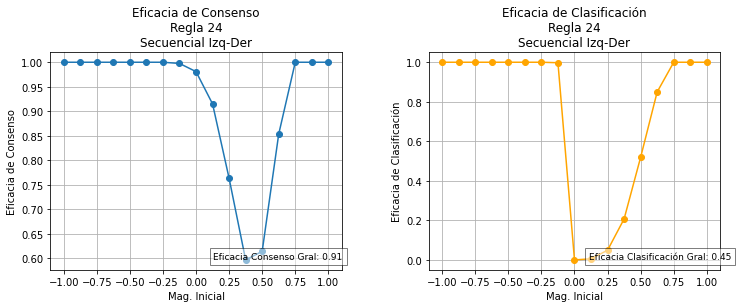

In [15]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso\nRegla 24\nSecuencial Izq-Der')
    ax1.text(0.56, 0.05, f'Eficacia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación\nRegla 24\nSecuencial Izq-Der')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

### Regla 24 (Derecha-Izquierda):
- Si Fx (Suma Vecinos) = {2,4} entonces 1.
- E.O.C. -1

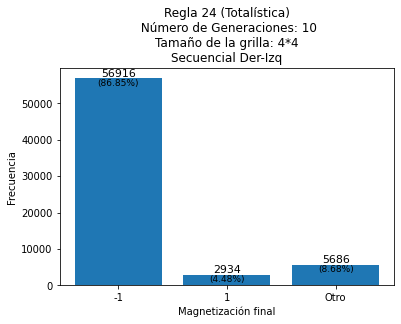

In [16]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == 2 or suma == 4:
        return 1
    else:
        return -1
    
def siguiente_generacion_secuencial(estado):
    tamano = estado.shape[0]
    nueva_generacion = estado.copy()

    for i in reversed(range(tamano)):
        for j in reversed(range(tamano)):
            vecindad = vecinos(nueva_generacion, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, nueva_generacion[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion_secuencial(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla 24 (Totalística)\n Número de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}\nSecuencial Der-Izq")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [17]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [18]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [19]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,16,0,0,1.0,1.0
2,-0.75,120,120,0,0,1.0,1.0
3,-0.625,560,560,0,0,1.0,1.0
4,-0.5,1820,1820,0,0,1.0,1.0
5,-0.375,4368,4368,0,0,1.0,1.0
6,-0.25,8008,8008,0,0,1.0,1.0
7,-0.125,11440,11412,0,28,0.997552,0.997552
8,0.0,12870,12620,4,246,0.980886,0.000311
9,0.125,11440,10400,68,972,0.915035,0.005944


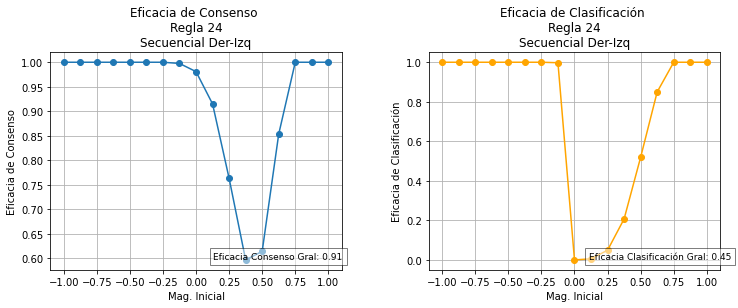

In [20]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla 24\nSecuencial Der-Izq')
    ax1.text(0.56, 0.05, f'Eficacia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla 24\nSecuencial Der-Izq')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

### Regla 024 (Izquierda-Derecha):
- Si Fx (Suma Vecinos) = {0,2,4} entonces 1.
- E.O.C. -1

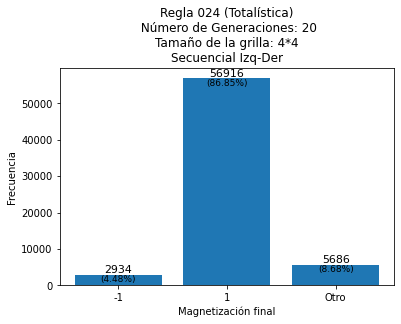

In [152]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == 0 or suma == 2 or suma == 4:
        return 1
    else:
        return -1
    
def siguiente_generacion_secuencial(estado):
    tamano = estado.shape[0]
    nueva_generacion = estado.copy()

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(nueva_generacion, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, nueva_generacion[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion_secuencial(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 20

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla 024 (Totalística)\n Número de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}\nSecuencial Izq-Der")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [22]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [23]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [24]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,16,0,0,1.0,1.0
2,-0.75,120,120,0,0,1.0,1.0
3,-0.625,560,476,2,82,0.853571,0.85
4,-0.5,1820,946,172,702,0.614286,0.51978
5,-0.375,4368,907,1700,1761,0.596841,0.207647
6,-0.25,8008,396,5717,1895,0.763362,0.049451
7,-0.125,11440,68,10400,972,0.915035,0.005944
8,0.0,12870,4,12620,246,0.980886,0.980575
9,0.125,11440,0,11412,28,0.997552,0.997552


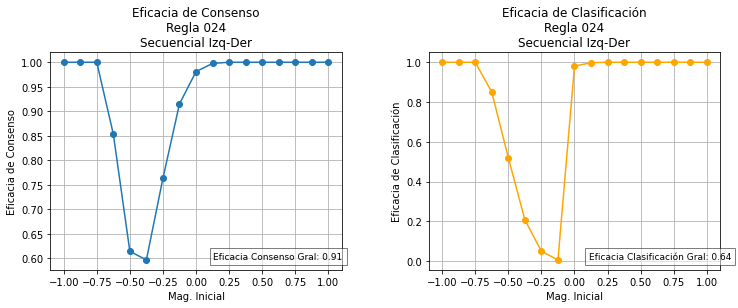

In [25]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso\nRegla 024\nSecuencial Izq-Der')
    ax1.text(0.56, 0.05, f'Eficacia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación\nRegla 024\nSecuencial Izq-Der')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

### Regla 024 (Derecha-Izquierda):
- Si Fx (Suma Vecinos) = {0,2,4} entonces 1.
- E.O.C. -1

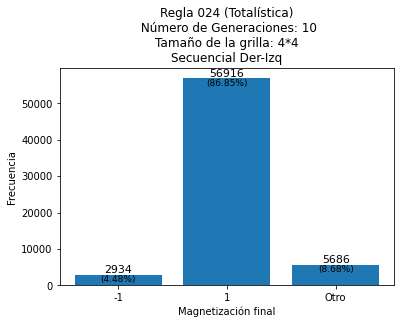

In [26]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == 0 or suma == 2 or suma == 4:
        return 1
    else:
        return -1
    
def siguiente_generacion_secuencial(estado):
    tamano = estado.shape[0]
    nueva_generacion = estado.copy()

    for i in reversed(range(tamano)):
        for j in reversed(range(tamano)):
            vecindad = vecinos(nueva_generacion, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, nueva_generacion[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion_secuencial(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla 024 (Totalística)\n Número de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}\nSecuencial Der-Izq")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [27]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [28]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [29]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,16,0,0,1.0,1.0
2,-0.75,120,120,0,0,1.0,1.0
3,-0.625,560,476,2,82,0.853571,0.85
4,-0.5,1820,946,172,702,0.614286,0.51978
5,-0.375,4368,907,1700,1761,0.596841,0.207647
6,-0.25,8008,396,5717,1895,0.763362,0.049451
7,-0.125,11440,68,10400,972,0.915035,0.005944
8,0.0,12870,4,12620,246,0.980886,0.980575
9,0.125,11440,0,11412,28,0.997552,0.997552


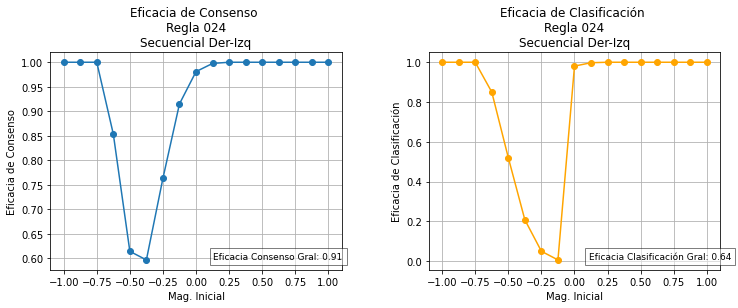

In [30]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla 024\nSecuencial Der-Izq')
    ax1.text(0.56, 0.05, f'Eficacia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla 024\nSecuencial Der-Izq')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

## O. Simulación ACB (Determinación Consenso - Actualización Aleatoria): 

- Estados Iniciales [-1 , 1].
- Implementación en **Todas las Combinaciones Posibles.**
- Generación Gráficos (**Eficacia de Consenso** y **Eficacia de Clasificación**).

### Regla Totalística (Estricta):
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx

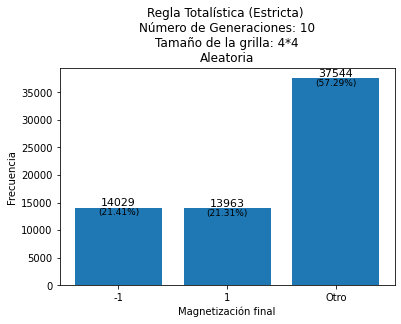

In [31]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return celda_actual

def siguiente_generacion_aleatoria(estado):
    tamano = estado.shape[0]
    nueva_generacion = estado.copy()

    # Crear una lista de todas las coordenadas de las celdas
    coordenadas = [(i, j) for i in range(tamano) for j in range(tamano)]
    
    # Desordenar la lista de coordenadas
    random.shuffle(coordenadas)

    # Recorrer la lista desordenada para actualizar las celdas
    for i, j in coordenadas:
        vecindad = vecinos(nueva_generacion, i, j)
        nueva_generacion[i, j] = regla_totalistica(vecindad, nueva_generacion[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion_aleatoria(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla Totalística (Estricta) \nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}\nAleatoria")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [32]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [33]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [34]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,16,0,0,1.0,1.0
2,-0.75,120,120,0,0,1.0,1.0
3,-0.625,560,560,0,0,1.0,1.0
4,-0.5,1820,1727,0,93,0.948901,0.948901
5,-0.375,4368,3484,0,884,0.797619,0.797619
6,-0.25,8008,4313,0,3695,0.538586,0.538586
7,-0.125,11440,2888,79,8473,0.259353,0.252448
8,0.0,12870,789,831,11250,0.125874,0.064569
9,0.125,11440,99,2835,8506,0.256469,0.247815


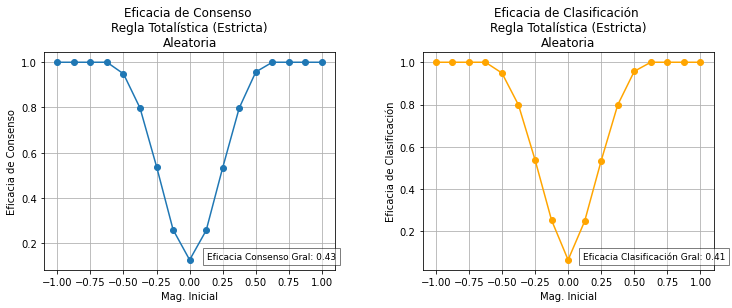

In [35]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla Totalística (Estricta)\nAleatoria')
    ax1.text(0.56, 0.05, f'Eficacia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla Totalística (Estricta)\nAleatoria')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

### Regla 024:
- Si Fx (Suma Vecinos) = {0,2,4} entonces 1.
- E.O.C. -1

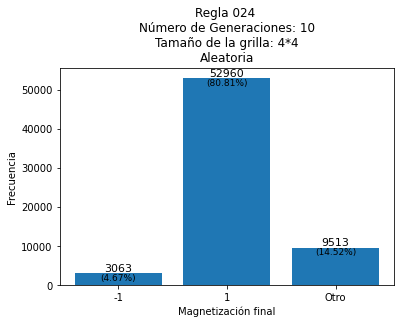

In [36]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == 0 or suma == 2 or suma == 4:
        return 1
    else:
        return -1

def siguiente_generacion_aleatoria(estado):
    tamano = estado.shape[0]
    nueva_generacion = estado.copy()

    # Crear una lista de todas las coordenadas de las celdas
    coordenadas = [(i, j) for i in range(tamano) for j in range(tamano)]
    
    # Desordenar la lista de coordenadas
    random.shuffle(coordenadas)

    # Recorrer la lista desordenada para actualizar las celdas
    for i, j in coordenadas:
        vecindad = vecinos(nueva_generacion, i, j)
        nueva_generacion[i, j] = regla_totalistica(vecindad, nueva_generacion[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion_aleatoria(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla 024 \nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}\nAleatoria")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [37]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [38]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [39]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,16,0,0,1.0,1.0
2,-0.75,120,112,0,8,0.933333,0.933333
3,-0.625,560,398,8,154,0.725,0.710714
4,-0.5,1820,803,196,821,0.548901,0.441209
5,-0.375,4368,849,1361,2158,0.505952,0.194368
6,-0.25,8008,594,4546,2868,0.641858,0.074176
7,-0.125,11440,196,9034,2210,0.806818,0.017133
8,0.0,12870,45,11746,1079,0.916162,0.912665
9,0.125,11440,4,11096,340,0.97028,0.96993


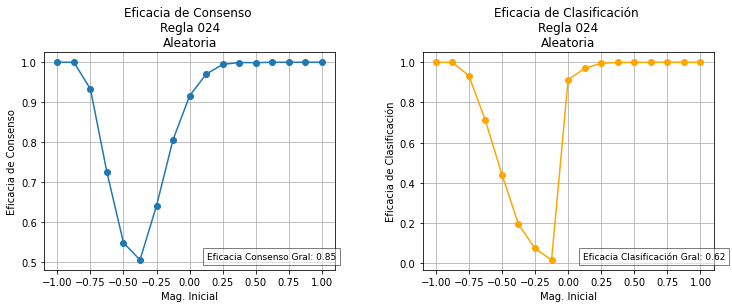

In [40]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla 024\nAleatoria')
    ax1.text(0.56, 0.05, f'Eficacia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla 024\nAleatoria')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

### Regla 24:
- Si Fx (Suma Vecinos) = {2,4} entonces 1.
- E.O.C. -1

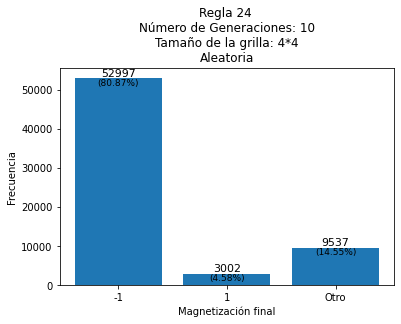

In [41]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == 2 or suma == 4:
        return 1
    else:
        return -1

def siguiente_generacion_aleatoria(estado):
    tamano = estado.shape[0]
    nueva_generacion = estado.copy()

    # Crear una lista de todas las coordenadas de las celdas
    coordenadas = [(i, j) for i in range(tamano) for j in range(tamano)]
    
    # Desordenar la lista de coordenadas
    random.shuffle(coordenadas)

    # Recorrer la lista desordenada para actualizar las celdas
    for i, j in coordenadas:
        vecindad = vecinos(nueva_generacion, i, j)
        nueva_generacion[i, j] = regla_totalistica(vecindad, nueva_generacion[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion_aleatoria(automata[t - 1])

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 4
estados = todas_las_combinaciones(tamano)
generaciones = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_ini = magnetizacion(automata[0])
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla 24 \nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}\nAleatoria")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [42]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    automata = automata_celular(tamano, generaciones, estado_inicial)
    magnetizacion_fin = magnetizacion(automata[-1])

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

In [43]:
# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [44]:
tabla

,Mag. Inicial,Cantidad Total,Mag. Final -1,Mag. Final 1,Mag. Final Otro,Eficacia de Consenso,Eficacia de Clasificación
0,-1.0,1,1,0,0,1.0,1.0
1,-0.875,16,16,0,0,1.0,1.0
2,-0.75,120,120,0,0,1.0,1.0
3,-0.625,560,560,0,0,1.0,1.0
4,-0.5,1820,1819,0,1,0.999451,0.999451
5,-0.375,4368,4365,0,3,0.999313,0.999313
6,-0.25,8008,7959,0,49,0.993881,0.993881
7,-0.125,11440,11126,4,310,0.972902,0.972552
8,0.0,12870,11754,35,1081,0.916006,0.00272
9,0.125,11440,8944,207,2289,0.799913,0.018094


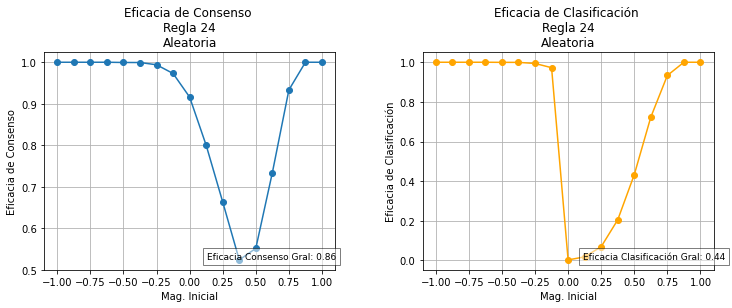

In [45]:
def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title('Eficacia de Consenso \nRegla 24\nAleatoria')
    ax1.text(0.56, 0.05, f'Eficacia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title('Eficacia de Clasificación \nRegla 24\nAleatoria')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

## P. Combinación de Reglas (Secuencial):
- Estados Iniciales [-1 , 1].
- Implementación en **Muestra aleatoria (50 Matrices)**.
- Características de la Muestra: Magnetización inicial [-0.25 - 0.25].

### Aplicación de Reglas:
- Total de 100 generaciones:
    - 50 Generaciones 1ra regla.
        - Detección Largo ciclo 2.
    - 50 Generaciones 2da regla.
        - Detección de Consenso.

#### Regla Totalística - Generaciones [0 - 49]:
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx

#### Regla 024 - Generaciones [50 - 99]:
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx


In [107]:
import numpy as np
import random

tamano = 100
num_matrices = 50
seed = 218
magnetizacion_min = -0.25
magnetizacion_max = 0.25

random.seed(seed)

def crear_matriz_aleatoria(tamano, magnetizacion_min, magnetizacion_max):
    while True:
        matriz = np.random.choice([-1, 1], size=(tamano, tamano))
        magnetizacion = np.mean(matriz)
        
        if abs(magnetizacion) > (magnetizacion_max - magnetizacion_min) / 2:
            continue
        
        ajuste = random.randint(magnetizacion_min * tamano**2, magnetizacion_max * tamano**2)
        signo_ajuste = np.sign(ajuste)

        for _ in range(abs(ajuste)):
            i, j = random.randint(0, tamano - 1), random.randint(0, tamano - 1)
            while matriz[i, j] == signo_ajuste:
                i, j = random.randint(0, tamano - 1), random.randint(0, tamano - 1)
            matriz[i, j] = signo_ajuste
        
        magnetizacion = np.mean(matriz)

        if magnetizacion_min <= magnetizacion <= magnetizacion_max:
            return matriz

matrices_aleatorias = [crear_matriz_aleatoria(tamano, magnetizacion_min, magnetizacion_max) for _ in range(num_matrices)]

# Calcular y mostrar la magnetización mínima y máxima de las matrices generadas
magnetizaciones_generadas = [np.mean(matriz) for matriz in matrices_aleatorias]
min_magnetizacion = min(magnetizaciones_generadas)
max_magnetizacion = max(magnetizaciones_generadas)

print(f"Magnetización mínima generada: {min_magnetizacion}")
print(f"Magnetización máxima generada: {max_magnetizacion}")

Magnetización mínima generada: -0.2206
Magnetización máxima generada: 0.2294


In [108]:
def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica_original(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return celda_actual

def regla_totalistica_nueva(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma in valores_regla:
        return 1
    else:
        return -1

def siguiente_generacion_secuencial(estado, regla):
    tamano = estado.shape[0]
    nueva_generacion = estado.copy()

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial, regla_1, regla_2, cambio_generacion):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        regla_actual = regla_1 if t < cambio_generacion else regla_2
        automata[t] = siguiente_generacion_secuencial(automata[t - 1], regla_actual)

    return automata

# Ejemplo de uso
generaciones = 100
estado_inicial = matrices_aleatorias
cambio_generacion = 50
valores_regla = {0, 2, 4}

# Crear autómatas celulares para cada estado inicial en matrices_aleatorias con las dos reglas
automatas_celulares = [automata_celular(tamano, generaciones, estado_inicial, 
                                        regla_totalistica_original, regla_totalistica_nueva, 
                                        cambio_generacion) for estado_inicial in matrices_aleatorias]

In [109]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for automata in automatas_celulares:
    estado_inicial = automata[0]
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    estado_final = automata[-1]
    magnetizacion_fin = magnetizacion(estado_final)

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

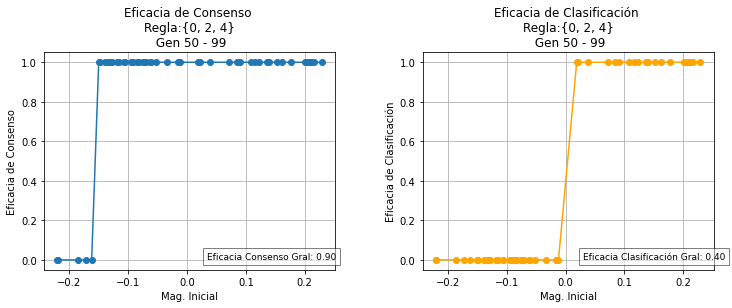

In [110]:
import matplotlib.pyplot as plt

def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title(f'Eficacia de Consenso \nRegla:{valores_regla}\n Gen 50 - 99')
    ax1.text(0.56, 0.05, f'Eficacia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title(f'Eficacia de Clasificación \nRegla:{valores_regla}\n Gen 50 - 99')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

In [ ]:
import os
import matplotlib.pyplot as plt
import imageio

def crear_gif(automata, tamano, generaciones, idx, directorio, cambio_generacion):
    if not os.path.exists(directorio):
        os.makedirs(directorio)

    nombre_archivo = f"{directorio}/BCA_s{tamano}_gen{generaciones}_{idx}_sec.gif"

    imagenes = []
    for t, matriz in enumerate(automata):
        plt.imshow(matriz, cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)

        # Actualizar el título según la generación y las reglas aplicadas
        if t < cambio_generacion:
            titulo = f"Generación {t} \nTamaño Grilla {tamano} \nRegla: Strict_sec"
        else:
            titulo = f"Generación {t} \nTamaño Grilla {tamano} \nRegla: {valores_regla}_sec"

        plt.title(titulo)
        plt.axis('on')
        filename = "temp.png"
        plt.savefig(filename)
        plt.close()

        image = imageio.v2.imread(filename)
        os.remove(filename)
        imagenes.append(image)

    imageio.mimsave(nombre_archivo, imagenes, fps=10)

directorio_gifs = f"BCA_s{tamano}_gen{generaciones}_mixStrict-{valores_regla}_sec"

# Iterar sobre la lista de autómatas celulares y generar un GIF para cada uno
for i, automata in enumerate(automatas_celulares):
    # Agregar el argumento cambio_generacion a la llamada de la función crear_gif
    crear_gif(automata, tamano, generaciones, i, directorio_gifs, cambio_generacion)

## Q. Combinación de Reglas (Secuencial):
- Estados Iniciales [-1 , 1].
- Implementación en **Muestra aleatoria (50 Matrices)**.
- Características de la Muestra: Magnetización inicial [-0.25 - 0.25].

### Aplicación de Reglas:
- Total de 100 generaciones:
    - 50 Generaciones Totalística.
    - Aleatoria Generaciones Regla 24.
    - Aleatoria Generaciones Regla 024.

#### Regla Totalística - Generaciones [random]:
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx

#### Regla 024 - Generaciones [random]:
- Si Fx (Suma Vecinos) = {0,2,4} entonces 1.
- E.O.C. -1

#### Regla 24 - Generaciones [random]:
- Si Fx (Suma Vecinos) = {2,4} entonces 1.
- E.O.C. -1


In [117]:
import numpy as np
import random

tamano = 100
num_matrices = 50
seed = 218
magnetizacion_min = -0.25
magnetizacion_max = 0.25

random.seed(seed)

def crear_matriz_aleatoria(tamano, magnetizacion_min, magnetizacion_max):
    while True:
        matriz = np.random.choice([-1, 1], size=(tamano, tamano))
        magnetizacion = np.mean(matriz)
        
        if abs(magnetizacion) > (magnetizacion_max - magnetizacion_min) / 2:
            continue
        
        ajuste = random.randint(magnetizacion_min * tamano**2, magnetizacion_max * tamano**2)
        signo_ajuste = np.sign(ajuste)

        for _ in range(abs(ajuste)):
            i, j = random.randint(0, tamano - 1), random.randint(0, tamano - 1)
            while matriz[i, j] == signo_ajuste:
                i, j = random.randint(0, tamano - 1), random.randint(0, tamano - 1)
            matriz[i, j] = signo_ajuste
        
        magnetizacion = np.mean(matriz)

        if magnetizacion_min <= magnetizacion <= magnetizacion_max:
            return matriz

matrices_aleatorias = [crear_matriz_aleatoria(tamano, magnetizacion_min, magnetizacion_max) for _ in range(num_matrices)]

# Calcular y mostrar la magnetización mínima y máxima de las matrices generadas
magnetizaciones_generadas = [np.mean(matriz) for matriz in matrices_aleatorias]
min_magnetizacion = min(magnetizaciones_generadas)
max_magnetizacion = max(magnetizaciones_generadas)

print(f"Magnetización mínima generada: {min_magnetizacion}")
print(f"Magnetización máxima generada: {max_magnetizacion}")

Magnetización mínima generada: -0.2434
Magnetización máxima generada: 0.2352


In [118]:
def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica_original(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return celda_actual

def regla_totalistica_nueva_uno(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma in valores_regla_uno:
        return 1
    else:
        return -1
    
def regla_totalistica_nueva_dos(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma in valores_regla_dos:
        return 1
    else:
        return -1

def siguiente_generacion_secuencial(estado, regla):
    tamano = estado.shape[0]
    nueva_generacion = estado.copy()

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial, regla_1, regla_2, regla_3, cambio_generacion):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        if t < cambio_generacion:
            regla_actual = regla_1
        else:
            regla_actual = random.choice([regla_2, regla_3])
        automata[t] = siguiente_generacion_secuencial(automata[t - 1], regla_actual)

    return automata

# Ejemplo de uso
generaciones = 100
estado_inicial = matrices_aleatorias
cambio_generacion = 50
valores_regla_uno = {0,2,4}
valores_regla_dos = {2,4}

# Crear autómatas celulares para cada estado inicial en matrices_aleatorias con las tres reglas
automatas_celulares = [automata_celular(tamano, generaciones, estado_inicial, 
                                        regla_totalistica_original, regla_totalistica_nueva_uno, 
                                        regla_totalistica_nueva_dos, 
                                        cambio_generacion) for estado_inicial in matrices_aleatorias]

In [119]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for automata in automatas_celulares:
    estado_inicial = automata[0]
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    estado_final = automata[-1]
    magnetizacion_fin = magnetizacion(estado_final)

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

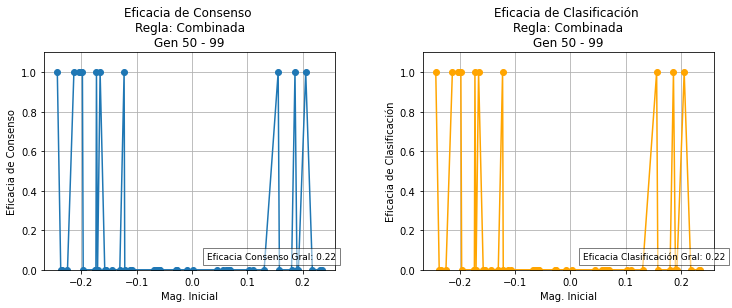

In [120]:
import matplotlib.pyplot as plt

def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    # Establecer los límites de los ejes y
    y_min = 0
    y_max = 1.1
    ax1.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', 
             label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title(f'Eficacia de Consenso \nRegla: Combinada\nGen 50 - 99')
    ax1.text(0.56, 0.05, f'Eficacia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', 
             color='orange', label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title(f'Eficacia de Clasificación \nRegla: Combinada\nGen 50 - 99')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

In [ ]:
import os
import matplotlib.pyplot as plt
import imageio

def crear_gif(automata, tamano, generaciones, idx, directorio, cambio_generacion):
    if not os.path.exists(directorio):
        os.makedirs(directorio)

    nombre_archivo = f"{directorio}/BCA_s{tamano}_gen{generaciones}_{idx}.gif"

    imagenes = []
    for t, matriz in enumerate(automata):
        plt.imshow(matriz, cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)

        # Actualizar el título según la generación y las reglas aplicadas
        if t < cambio_generacion:
            titulo = f"Generación {t} \nTamaño Grilla {tamano} \nRegla: Strict"
        else:
            titulo = f"Generación {t} \nTamaño Grilla {tamano} \nRegla: Combinada"

        plt.title(titulo)
        plt.axis('on')
        filename = "temp.png"
        plt.savefig(filename)
        plt.close()

        image = imageio.v2.imread(filename)
        os.remove(filename)
        imagenes.append(image)

    imageio.mimsave(nombre_archivo, imagenes, fps=10)

directorio_gifs = f"BCA_s{tamano}_gen{generaciones}_mixStrict-Combinada"

# Iterar sobre la lista de autómatas celulares y generar un GIF para cada uno
for i, automata in enumerate(automatas_celulares):
    # Agregar el argumento cambio_generacion a la llamada de la función crear_gif
    crear_gif(automata, tamano, generaciones, i, directorio_gifs, cambio_generacion)

## R. Combinación de Reglas (Secuencial):
- Estados Iniciales [-1 , 1].
- Implementación en **Muestra aleatoria (50 Matrices)**.
- Características de la Muestra: Magnetización inicial [-0.25 - 0.25].

### Aplicación de Reglas:
- Total de 100 generaciones:
    - 50 Generaciones Totalística.
    - 25 Generaciones Regla 24.
    - 25 Generaciones Regla 024.

#### Regla Totalística - Generaciones [0-49]:
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx

#### Regla 024 - Generaciones [50-74]:
- Si Fx (Suma Vecinos) = {0,2,4} entonces 1.
- E.O.C. -1

#### Regla 24 - Generaciones [75-99]:
- Si Fx (Suma Vecinos) = {2,4} entonces 1.
- E.O.C. -1


In [121]:
import numpy as np
import random

tamano = 100
num_matrices = 50
seed = 218
magnetizacion_min = -0.25
magnetizacion_max = 0.25

random.seed(seed)

def crear_matriz_aleatoria(tamano, magnetizacion_min, magnetizacion_max):
    while True:
        matriz = np.random.choice([-1, 1], size=(tamano, tamano))
        magnetizacion = np.mean(matriz)
        
        if abs(magnetizacion) > (magnetizacion_max - magnetizacion_min) / 2:
            continue
        
        ajuste = random.randint(magnetizacion_min * tamano**2, magnetizacion_max * tamano**2)
        signo_ajuste = np.sign(ajuste)

        for _ in range(abs(ajuste)):
            i, j = random.randint(0, tamano - 1), random.randint(0, tamano - 1)
            while matriz[i, j] == signo_ajuste:
                i, j = random.randint(0, tamano - 1), random.randint(0, tamano - 1)
            matriz[i, j] = signo_ajuste
        
        magnetizacion = np.mean(matriz)

        if magnetizacion_min <= magnetizacion <= magnetizacion_max:
            return matriz

matrices_aleatorias = [crear_matriz_aleatoria(tamano, magnetizacion_min, magnetizacion_max) for _ in range(num_matrices)]

# Calcular y mostrar la magnetización mínima y máxima de las matrices generadas
magnetizaciones_generadas = [np.mean(matriz) for matriz in matrices_aleatorias]
min_magnetizacion = min(magnetizaciones_generadas)
max_magnetizacion = max(magnetizaciones_generadas)

print(f"Magnetización mínima generada: {min_magnetizacion}")
print(f"Magnetización máxima generada: {max_magnetizacion}")

Magnetización mínima generada: -0.2486
Magnetización máxima generada: 0.2286


In [122]:
def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica_original(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return celda_actual

def regla_totalistica_nueva_uno(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma in valores_regla_uno:
        return 1
    else:
        return -1
    
def regla_totalistica_nueva_dos(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma in valores_regla_dos:
        return 1
    else:
        return -1

def siguiente_generacion_secuencial(estado, regla):
    tamano = estado.shape[0]
    nueva_generacion = estado.copy()

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial, regla_1, regla_2, regla_3, cambio_generacion, duracion_regla):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    reglas_post_cambio = [regla_2, regla_3]
    indice_regla_actual = 0
    contador_regla = 0

    for t in range(1, generaciones):
        if t < cambio_generacion:
            regla_actual = regla_1
        else:
            regla_actual = reglas_post_cambio[indice_regla_actual]
            contador_regla += 1

            if contador_regla == duracion_regla:
                contador_regla = 0
                indice_regla_actual = (indice_regla_actual + 1) % len(reglas_post_cambio)

        automata[t] = siguiente_generacion_secuencial(automata[t - 1], regla_actual)

    return automata

# Ejemplo de uso
generaciones = 100
estado_inicial = matrices_aleatorias
cambio_generacion = 50
duracion_regla = 25
valores_regla_uno = {0,2,4}
valores_regla_dos = {2,4}

# Crear autómatas celulares para cada estado inicial en matrices_aleatorias con las tres reglas
automatas_celulares = [automata_celular(tamano, generaciones, estado_inicial, 
                                        regla_totalistica_original, regla_totalistica_nueva_uno, 
                                        regla_totalistica_nueva_dos, 
                                        cambio_generacion, duracion_regla) for estado_inicial in matrices_aleatorias]

In [123]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for automata in automatas_celulares:
    estado_inicial = automata[0]
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    estado_final = automata[-1]
    magnetizacion_fin = magnetizacion(estado_final)

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

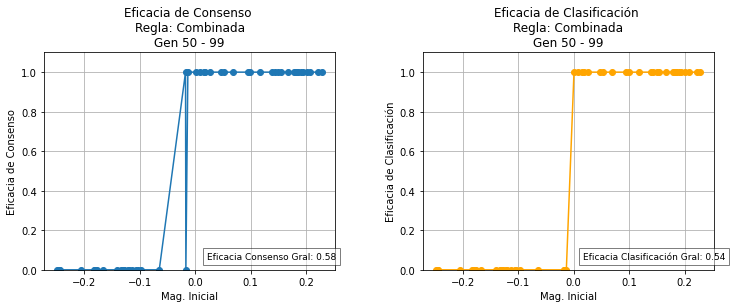

In [124]:
import matplotlib.pyplot as plt

def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    # Establecer los límites de los ejes y
    y_min = 0
    y_max = 1.1
    ax1.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', 
             label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title(f'Eficacia de Consenso \nRegla: Combinada\nGen 50 - 99')
    ax1.text(0.56, 0.05, f'Eficacia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', 
             color='orange', label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title(f'Eficacia de Clasificación \nRegla: Combinada\nGen 50 - 99')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

In [ ]:
import os
import matplotlib.pyplot as plt
import imageio

def crear_gif(automata, tamano, generaciones, idx, directorio, cambio_generacion):
    if not os.path.exists(directorio):
        os.makedirs(directorio)

    nombre_archivo = f"{directorio}/BCA_s{tamano}_gen{generaciones}_{idx}.gif"

    imagenes = []
    for t, matriz in enumerate(automata):
        plt.imshow(matriz, cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)

        # Actualizar el título según la generación y las reglas aplicadas
        if t < cambio_generacion:
            titulo = f"Generación {t} \nTamaño Grilla {tamano} \nRegla: Strict"
        else:
            titulo = f"Generación {t} \nTamaño Grilla {tamano} \nRegla: Combinada"

        plt.title(titulo)
        plt.axis('on')
        filename = "temp.png"
        plt.savefig(filename)
        plt.close()

        image = imageio.v2.imread(filename)
        os.remove(filename)
        imagenes.append(image)

    imageio.mimsave(nombre_archivo, imagenes, fps=10)

directorio_gifs = f"BCA_s{tamano}_gen{generaciones}_mixStrict-Combinada"

# Iterar sobre la lista de autómatas celulares y generar un GIF para cada uno
for i, automata in enumerate(automatas_celulares):
    # Agregar el argumento cambio_generacion a la llamada de la función crear_gif
    crear_gif(automata, tamano, generaciones, i, directorio_gifs, cambio_generacion)

## S. Combinación de Reglas (Secuencial):
- Estados Iniciales [-1 , 1].
- Implementación en **Muestra aleatoria (50 Matrices)**.
- Características de la Muestra: Magnetización inicial [-0.25 - 0.25].

### Aplicación de Reglas:
- Total de 100 generaciones:
    - 50 Generaciones Regla 024.
    - 50 Generaciones Regla 24.

#### Regla 024 - Generaciones [00-49]:
- Si Fx (Suma Vecinos) = {0,2,4} entonces 1.
- E.O.C. -1

#### Regla 24 - Generaciones [50-99]:
- Si Fx (Suma Vecinos) = {2,4} entonces 1.
- E.O.C. -1


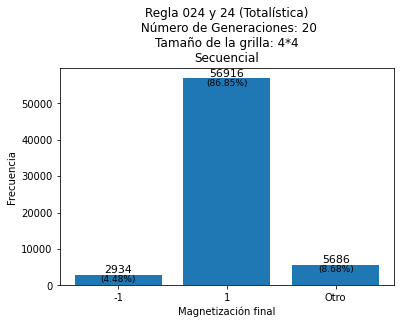

In [153]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import imageio
import os
import random
import math

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano * tamano))

def estado_a_matriz(estado, tamano):
    return np.array(estado).reshape(tamano, tamano)

def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

# Definir los conjuntos de valores de las reglas
valores_regla_uno = {0, 2, 4}
valores_regla_dos = {0, 2, 4}

def regla_totalistica_nueva_uno(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma in valores_regla_uno:
        return 1
    else:
        return -1
    
def regla_totalistica_nueva_dos(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma in valores_regla_dos:
        return 1
    else:
        return -1

def siguiente_generacion_secuencial(estado, regla):
    tamano = estado.shape[0]
    nueva_generacion = estado.copy()

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(nueva_generacion, i, j)
            nueva_generacion[i, j] = regla(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial, regla_1, regla_2, cambio_generacion):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        if t < cambio_generacion:
            regla_actual = regla_1
        else:
            regla_actual = regla_2

        automata[t] = siguiente_generacion_secuencial(automata[t - 1], regla_actual)

    return automata

def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

# Ejemplo de uso
tamano = 4
generaciones = 20
estados = todas_las_combinaciones(tamano)
cambio_generacion = 10

for estado in estados:
    estado_inicial = estado_a_matriz(estado, tamano)
    automata = automata_celular(tamano, generaciones, estado_inicial, 
                                regla_totalistica_nueva_uno, regla_totalistica_nueva_dos, 
                                cambio_generacion)
    magnetizacion_ini = magnetizacion_inicial(automata)
    
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        magnetizacion_fin = magnetizacion(automata[-1])
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Regla 024 y 24 (Totalística)\n Número de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}*{tamano}\nSecuencial")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [150]:
automata

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1

In [137]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for automata in automatas_celulares:
    estado_inicial = automata[0]
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    estado_final = automata[-1]
    magnetizacion_fin = magnetizacion(estado_final)

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [138]:
import matplotlib.pyplot as plt

def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    # Establecer los límites de los ejes y
    y_min = 0
    y_max = 1.1
    ax1.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', 
             label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title(f'Eficacia de Consenso \nRegla: Combinada\nGen 50 - 99')
    ax1.text(0.56, 0.05, f'Eficacia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', 
             color='orange', label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title(f'Eficacia de Clasificación \nRegla: Combinada\nGen 50 - 99')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

ZeroDivisionError: division by zero

In [149]:
import os
import matplotlib.pyplot as plt
import imageio

def crear_gif(automata, tamano, generaciones, idx, directorio, cambio_generacion):
    if not os.path.exists(directorio):
        os.makedirs(directorio)

    nombre_archivo = f"{directorio}/BCA_s{tamano}_gen{generaciones}_{idx}.gif"

    imagenes = []
    for t, matriz in enumerate(automata):
        plt.imshow(matriz, cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)

        # Actualizar el título según la generación y las reglas aplicadas
        if t < cambio_generacion:
            titulo = f"Generación {t} \nTamaño Grilla {tamano} \nRegla: Strict"
        else:
            titulo = f"Generación {t} \nTamaño Grilla {tamano} \nRegla: Combinada"

        plt.title(titulo)
        plt.axis('on')
        filename = "temp.png"
        plt.savefig(filename)
        plt.close()

        image = imageio.v2.imread(filename)
        os.remove(filename)
        imagenes.append(image)

    imageio.mimsave(nombre_archivo, imagenes, fps=10)

directorio_gifs = f"BCA_s{tamano}_gen{generaciones}_mix024-24"

# Iterar sobre la lista de autómatas celulares y generar un GIF para cada uno
for i, automata in enumerate(automatas_celulares):
    # Agregar el argumento cambio_generacion a la llamada de la función crear_gif
    crear_gif(automata, tamano, generaciones, i, directorio_gifs, cambio_generacion)

______

## T. Combinación de Reglas (**SECUENCIAL**):
- Estados Iniciales [-1 , 1].
- Implementación en **Muestra aleatoria (50 Matrices)**.
- Características de la Muestra: Magnetización inicial [-1 - 1].

### Aplicación de Reglas:
- Total de 100 generaciones:
    - 50 Generaciones 1ra regla.
        - Detección Largo ciclo 2.
    - 50 Generaciones 2da regla.
        - Detección de Consenso.

#### Regla Totalística - Generaciones [0 - 49]:
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx

#### Regla 024 - Generaciones [50 - 99]:
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx


In [67]:
import numpy as np
import random

tamano = 4
num_matrices = 2
seed = 218
magnetizacion_min = -0.5
magnetizacion_max = 0.5

random.seed(seed)

def crear_matriz_aleatoria(tamano, magnetizacion_min, magnetizacion_max):
    while True:
        matriz = np.random.choice([-1, 1], size=(tamano, tamano))
        magnetizacion = np.mean(matriz)
        
        if abs(magnetizacion) > (magnetizacion_max - magnetizacion_min) / 2:
            continue
        
        ajuste = random.randint(magnetizacion_min * tamano**2, magnetizacion_max * tamano**2)
        signo_ajuste = np.sign(ajuste)

        for _ in range(abs(ajuste)):
            i, j = random.randint(0, tamano - 1), random.randint(0, tamano - 1)
            while matriz[i, j] == signo_ajuste:
                i, j = random.randint(0, tamano - 1), random.randint(0, tamano - 1)
            matriz[i, j] = signo_ajuste
        
        magnetizacion = np.mean(matriz)

        if magnetizacion_min <= magnetizacion <= magnetizacion_max:
            return matriz

matrices_aleatorias = [crear_matriz_aleatoria(tamano, magnetizacion_min, magnetizacion_max) for _ in range(num_matrices)]

# Calcular y mostrar la magnetización mínima y máxima de las matrices generadas
magnetizaciones_generadas = [np.mean(matriz) for matriz in matrices_aleatorias]
min_magnetizacion = min(magnetizaciones_generadas)
max_magnetizacion = max(magnetizaciones_generadas)

print(f"Magnetización mínima generada: {min_magnetizacion}")
print(f"Magnetización máxima generada: {max_magnetizacion}")

Magnetización mínima generada: 0.0
Magnetización máxima generada: 0.5


In [71]:
matrices_aleatorias[0]

array([[ 1,  1, -1, -1],
       [ 1, -1,  1, -1],
       [ 1, -1,  1, -1],
       [-1,  1, -1,  1]])

In [80]:
def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica_original(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == 2 or suma == 4:
        return 1
    else:
        return -1

def regla_totalistica_nueva(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma == 0 or suma == 2 or suma == 4:
        return 1
    else:
        return -1

def siguiente_generacion_secuencial(estado, regla):
    tamano = estado.shape[0]
    nueva_generacion = estado.copy()

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial, regla_1, regla_2, cambio_generacion, ciclos):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial
    
    ciclo_actual = 0
    for t in range(1, generaciones):
        if t % cambio_generacion == 0:
            ciclo_actual += 1
        
        if ciclo_actual % 2 == 0:  # Ciclos pares usan regla_1
            regla_actual = regla_1
        else:  # Ciclos impares usan regla_2
            regla_actual = regla_2
        
        automata[t] = siguiente_generacion_secuencial(automata[t - 1], regla_actual)

    return automata

# Ejemplo de uso
generaciones = 80
estado_inicial = matrices_aleatorias
cambio_generacion = 20
ciclos = 4

# Crear autómatas celulares para cada estado inicial en matrices_aleatorias con las dos reglas
automatas_celulares = [automata_celular(tamano, generaciones, estado_inicial,
                                        regla_totalistica_original, regla_totalistica_nueva,
                                        cambio_generacion, ciclos) for estado_inicial in matrices_aleatorias]

In [81]:
automatas_celulares[0]

array([[[ 1,  1, -1, -1],
        [ 1, -1,  1, -1],
        [ 1, -1,  1, -1],
        [-1,  1, -1,  1]],

       [[-1, -1, -1, -1],
        [-1,  1, -1, -1],
        [-1,  1, -1,  1],
        [ 1, -1,  1, -1]],

       [[-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [ 1, -1,  1, -1],
        [-1,  1, -1,  1]],

       ...,

       [[-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1,  1, -1,  1],
        [ 1, -1,  1, -1]],

       [[-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [ 1, -1,  1, -1],
        [-1,  1, -1,  1]],

       [[-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1,  1, -1,  1],
        [ 1, -1,  1, -1]]])

In [82]:
def magnetizacion(estado):
    return np.sum(estado) / (estado.shape[0] * estado.shape[1])

# Crear autómatas celulares y calcular magnetización para cada generación
magnetizaciones_por_generacion = []

for estado_inicial in matrices_aleatorias:
    automata = automata_celular(tamano, generaciones, estado_inicial,
                                regla_totalistica_original, regla_totalistica_nueva,
                                cambio_generacion, ciclos)
    
    magnetizaciones = [magnetizacion(estado) for estado in automata]
    magnetizaciones_por_generacion.append(magnetizaciones)

# Ahora 'magnetizaciones_por_generacion' es una lista de listas, donde cada sublista contiene la magnetización
# para cada generación de un autómata en particular.

In [85]:
magnetizaciones

[0.5,
 0.5,
 0.125,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [17]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for automata in automatas_celulares:
    estado_inicial = automata[0]
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    estado_final = automata[-1]
    magnetizacion_fin = magnetizacion(estado_final)

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

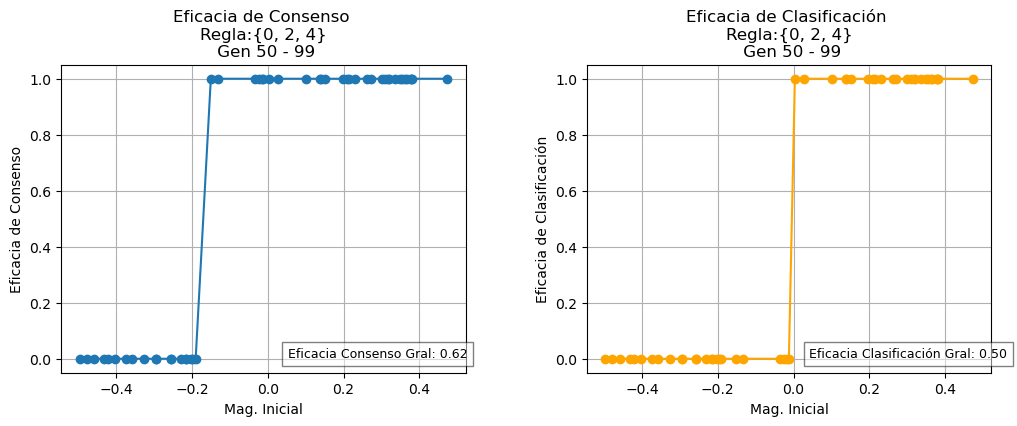

In [18]:
import matplotlib.pyplot as plt

def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title(f'Eficacia de Consenso \nRegla:{valores_regla}\n Gen 50 - 99')
    ax1.text(0.56, 0.05, f'Eficacia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', color='orange', 
             label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title(f'Eficacia de Clasificación \nRegla:{valores_regla}\n Gen 50 - 99')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

In [ ]:
import os
import matplotlib.pyplot as plt
import imageio

def crear_gif(automata, tamano, generaciones, idx, directorio, cambio_generacion):
    if not os.path.exists(directorio):
        os.makedirs(directorio)

    nombre_archivo = f"{directorio}/BCA_s{tamano}_gen{generaciones}_{idx}.gif"

    imagenes = []
    for t, matriz in enumerate(automata):
        plt.imshow(matriz, cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)

        # Actualizar el título según la generación y las reglas aplicadas
        if t < cambio_generacion:
            titulo = f"Generación {t} \nTamaño Grilla {tamano} \nRegla: Strict"
        else:
            titulo = f"Generación {t} \nTamaño Grilla {tamano} \nRegla: {valores_regla}"

        plt.title(titulo)
        plt.axis('on')
        filename = "temp.png"
        plt.savefig(filename)
        plt.close()

        image = imageio.v2.imread(filename)
        os.remove(filename)
        imagenes.append(image)

    imageio.mimsave(nombre_archivo, imagenes, fps=10)

directorio_gifs = f"BCA_s{tamano}_gen{generaciones}_mixStrict-{valores_regla}"

# Iterar sobre la lista de autómatas celulares y generar un GIF para cada uno
for i, automata in enumerate(automatas_celulares):
    # Agregar el argumento cambio_generacion a la llamada de la función crear_gif
    crear_gif(automata, tamano, generaciones, i, directorio_gifs, cambio_generacion)

## U. Combinación de Reglas:
- Estados Iniciales [-1 , 1].
- Implementación en **Muestra aleatoria (50 Matrices)**.
- Características de la Muestra: Magnetización inicial [-0.50 - 0.50].

### Aplicación de Reglas:
- Total de 100 generaciones:
    - 50 Generaciones 1ra regla.
        - Detección Largo ciclo 2.
    - 50 Generaciones 2da/3ra regla.
        - Detección de Consenso.

#### Regla Totalística - Generaciones [0 - 49]:
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx

#### Regla 024 - Generaciones [50 - 99]:
- Si Fx (Suma Vecinos) = {0,2,4} entonces 1.
- E.O.C. -1

#### Regla 24 - Generaciones [50 - 99]:
- Si Fx (Suma Vecinos) = {2,4} entonces 1.
- E.O.C. -1


In [62]:
import numpy as np
import random

tamano = 4
num_matrices = 5
seed = 218
magnetizacion_min = -0.50
magnetizacion_max = 0.50

random.seed(seed)

def crear_matriz_aleatoria(tamano, magnetizacion_min, magnetizacion_max):
    while True:
        matriz = np.random.choice([-1, 1], size=(tamano, tamano))
        magnetizacion = np.mean(matriz)
        
        if abs(magnetizacion) > (magnetizacion_max - magnetizacion_min) / 2:
            continue
        
        ajuste = random.randint(magnetizacion_min * tamano**2, magnetizacion_max * tamano**2)
        signo_ajuste = np.sign(ajuste)

        for _ in range(abs(ajuste)):
            i, j = random.randint(0, tamano - 1), random.randint(0, tamano - 1)
            while matriz[i, j] == signo_ajuste:
                i, j = random.randint(0, tamano - 1), random.randint(0, tamano - 1)
            matriz[i, j] = signo_ajuste
        
        magnetizacion = np.mean(matriz)

        if magnetizacion_min <= magnetizacion <= magnetizacion_max:
            return matriz

matrices_aleatorias = [crear_matriz_aleatoria(tamano, magnetizacion_min, magnetizacion_max) for _ in range(num_matrices)]

# Calcular y mostrar la magnetización mínima y máxima de las matrices generadas
magnetizaciones_generadas = [np.mean(matriz) for matriz in matrices_aleatorias]
min_magnetizacion = min(magnetizaciones_generadas)
max_magnetizacion = max(magnetizaciones_generadas)

print(f"Magnetización mínima generada: {min_magnetizacion}")
print(f"Magnetización máxima generada: {max_magnetizacion}")

Magnetización mínima generada: -0.375
Magnetización máxima generada: 0.5


In [60]:
def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

def regla_totalistica_original(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return celda_actual

def regla_totalistica_nueva_uno(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma in valores_regla_uno:
        return 1
    else:
        return -1
    
def regla_totalistica_nueva_dos(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma in valores_regla_dos:
        return 1
    else:
        return -1

def siguiente_generacion_secuencial(estado, regla):
    tamano = estado.shape[0]
    nueva_generacion = estado.copy()

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla(vecindad, estado[i, j])

    return nueva_generacion

def automata_celular(tamano, generaciones, estado_inicial, regla_1, regla_2, regla_3, cambio_generacion):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        if t < cambio_generacion:
            regla_actual = regla_1
        else:
            magnetizacion = np.mean(automata[cambio_generacion - 1])
            if magnetizacion >= 0:
                regla_actual = regla_2
            else:
                regla_actual = regla_3
        automata[t] = siguiente_generacion_secuencial(automata[t - 1], regla_actual)

    return automata

# Ejemplo de uso
generaciones = 100
estado_inicial = matrices_aleatorias
cambio_generacion = 50
valores_regla_uno = {0,2,4}
valores_regla_dos = {2,4}

# Crear autómatas celulares para cada estado inicial en matrices_aleatorias con las tres reglas
automatas_celulares = [automata_celular(tamano, generaciones, estado_inicial, 
                                        regla_totalistica_original, regla_totalistica_nueva_uno, 
                                        regla_totalistica_nueva_dos, 
                                        cambio_generacion) for estado_inicial in matrices_aleatorias]

KeyboardInterrupt: 

In [ ]:
import pandas as pd

# Función para calcular la magnetización
def magnetizacion(estado):
    return np.mean(estado)

# Inicialización de la tabla
tabla = pd.DataFrame(columns=['Mag. Inicial', 'Cantidad Total', 'Mag. Final -1', 
                              'Mag. Final 1', 'Mag. Final Otro', 'Eficacia de Consenso', 'Eficacia de Clasificación'])

# Inicialización de un diccionario para almacenar las estadísticas
stats = {}

for automata in automatas_celulares:
    estado_inicial = automata[0]
    magnetizacion_ini = magnetizacion(estado_inicial)

    if magnetizacion_ini not in stats:
        stats[magnetizacion_ini] = {'total': 0, 'fin_-1': 0, 'fin_1': 0, 'fin_otro': 0}

    stats[magnetizacion_ini]['total'] += 1

    estado_final = automata[-1]
    magnetizacion_fin = magnetizacion(estado_final)

    if magnetizacion_fin == -1:
        stats[magnetizacion_ini]['fin_-1'] += 1
    elif magnetizacion_fin == 1:
        stats[magnetizacion_ini]['fin_1'] += 1
    else:
        stats[magnetizacion_ini]['fin_otro'] += 1

# Agrega las filas a la tabla de acuerdo a los resultados almacenados en el diccionario
for mag_ini, valores in stats.items():
    eficacia_consenso = (valores['fin_-1'] + valores['fin_1']) / valores['total']
    if mag_ini < 0:
        eficacia_clasificacion = valores['fin_-1'] / valores['total']
    else:
        eficacia_clasificacion = valores['fin_1'] / valores['total']

    fila = pd.DataFrame({'Mag. Inicial': [mag_ini],
                         'Cantidad Total': [valores['total']],
                         'Mag. Final -1': [valores['fin_-1']],
                         'Mag. Final 1': [valores['fin_1']],
                         'Mag. Final Otro': [valores['fin_otro']],
                         'Eficacia de Consenso': [eficacia_consenso],
                         'Eficacia de Clasificación': [eficacia_clasificacion]})
    tabla = pd.concat([tabla, fila], ignore_index=True)

# Ordena la tabla por magnetización inicial y muestra los resultados
tabla = tabla.sort_values(by='Mag. Inicial', ascending=True)
tabla.reset_index(drop=True, inplace=True)

# Calcular las sumas de las columnas
suma_cantidad = tabla['Cantidad Total'].sum()
suma_fin_neg_1 = tabla['Mag. Final -1'].sum()
suma_fin_1 = tabla['Mag. Final 1'].sum()
suma_fin_otro = tabla['Mag. Final Otro'].sum()

# Crear un nuevo DataFrame con la fila de sumas
fila_suma = pd.DataFrame({'Mag. Inicial': ['Suma'],
                          'Cantidad Total': [suma_cantidad],
                          'Mag. Final -1': [suma_fin_neg_1],
                          'Mag. Final 1': [suma_fin_1],
                          'Mag. Final Otro': [suma_fin_otro],
                          'Eficacia de Consenso': [None],
                          'Eficacia de Clasificación': [None]})

# Concatenar la fila de sumas al DataFrame 'tabla'
tabla = pd.concat([tabla, fila_suma], ignore_index=True)

In [ ]:
import matplotlib.pyplot as plt

def generar_graficos(tabla):
    # Eliminar la última fila con la suma de las columnas
    tabla_sin_total = tabla[:-1]

    # Calcular la Eficacia de Consenso general
    eficacia_consenso_general = (tabla.loc[tabla.index[-1], 'Mag. Final -1'] + 
                                 tabla.loc[tabla.index[-1], 
                                 'Mag. Final 1']) / tabla.loc[tabla.index[-1], 'Cantidad Total']
    
    # Calcular la Eficacia de Clasificación general
    eficacia_clasificacion_general = sum(tabla_sin_total['Eficacia de Clasificación'] * 
                                         tabla_sin_total['Cantidad Total']) / sum(tabla_sin_total['Cantidad Total'])


    # Crear una figura con dos subgráficos, uno al lado del otro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    # Establecer los límites de los ejes y
    y_min = 0
    y_max = 1.1
    ax1.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)

    # Crear el primer gráfico: Mag. Inicial vs Eficacia de Consenso
    ax1.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Consenso'], marker='o', linestyle='-', 
             label='Eficacia de Consenso')
    ax1.set_xlabel('Mag. Inicial')
    ax1.set_ylabel('Eficacia de Consenso')
    ax1.set_title(f'Eficacia de Consenso \nRegla: Combinada\nGen 50 - 99')
    ax1.text(0.56, 0.05, f'Eficacia Consenso Gral: {eficacia_consenso_general:.2f}', 
             transform=ax1.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax1.grid(True)

    # Crear el segundo gráfico: Mag. Inicial vs Eficacia de Clasificación
    ax2.plot(tabla_sin_total['Mag. Inicial'], tabla_sin_total['Eficacia de Clasificación'], marker='o', linestyle='-', 
             color='orange', label='Eficacia de Clasificación')
    # Añadir la eficacia de clasificación general al segundo gráfico
    ax2.text(0.55, 0.05, f'Eficacia Clasificación Gral: {eficacia_clasificacion_general:.2f}', 
             transform=ax2.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_xlabel('Mag. Inicial')
    ax2.set_ylabel('Eficacia de Clasificación')
    ax2.set_title(f'Eficacia de Clasificación \nRegla: Combinada\nGen 50 - 99')
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos y mostrarlos
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Llamar a la función generar_graficos y pasarle el DataFrame 'tabla'
generar_graficos(tabla)

In [ ]:
import os
import matplotlib.pyplot as plt
import imageio

def crear_gif(automata, tamano, generaciones, idx, directorio, cambio_generacion):
    if not os.path.exists(directorio):
        os.makedirs(directorio)

    nombre_archivo = f"{directorio}/BCA_s{tamano}_gen{generaciones}_{idx}.gif"

    imagenes = []
    for t, matriz in enumerate(automata):
        plt.imshow(matriz, cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)

        # Actualizar el título según la generación y las reglas aplicadas
        if t < cambio_generacion:
            titulo = f"Generación {t} \nTamaño Grilla {tamano} \nRegla: Strict"
        else:
            titulo = f"Generación {t} \nTamaño Grilla {tamano} \nRegla: Combinada"

        plt.title(titulo)
        plt.axis('on')
        filename = "temp.png"
        plt.savefig(filename)
        plt.close()

        image = imageio.v2.imread(filename)
        os.remove(filename)
        imagenes.append(image)

    imageio.mimsave(nombre_archivo, imagenes, fps=10)

directorio_gifs = f"BCA_s{tamano}_gen{generaciones}_mixStrict-Combinada"

# Iterar sobre la lista de autómatas celulares y generar un GIF para cada uno
for i, automata in enumerate(automatas_celulares):
    # Agregar el argumento cambio_generacion a la llamada de la función crear_gif
    crear_gif(automata, tamano, generaciones, i, directorio_gifs, cambio_generacion)